In [1]:
# Process GWAS results, heritability, plotting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import sys
sys.path.append('/data100t1/home/wanying/lab_code/utils/')
from manhattan_plot import manhattan_plot
import datetime
print('Last run:', datetime.datetime.now().strftime('%Y-%m-%d'))

Last run: 2023-09-01


## 1. Check heritability estimation
This is part of fastGWA, values are stored in *.log

Entries with heritability < 0.2


,heritability,pval
FFA,0.179708,0.022644
deDE,0.149582,0.059304
PE(O),0.141348,0.079771
BA,0.071156,0.328429


Entries with heritability < 0.2


,heritability,pval
PE-P-15:0-22:6-_-b-,0.198316,0.012391
TG-O-50:2-_[NL-16:1],0.197319,0.012653
AC-14:1--OH,0.197279,0.012822
PC-O-32:1-,0.193108,0.013262
PC-O-34:4-,0.193917,0.015039
PC(32:2),0.192364,0.016934
FA(14:0),0.181957,0.018370
PC-42:6-_-a-,0.181624,0.018958
AC(22:5),0.178847,0.019575
PE-O-16:0-20:3-,0.180499,0.020369


(<Figure size 4500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'Heritability estimation of lipid species'}, ylabel='Heritability'>)

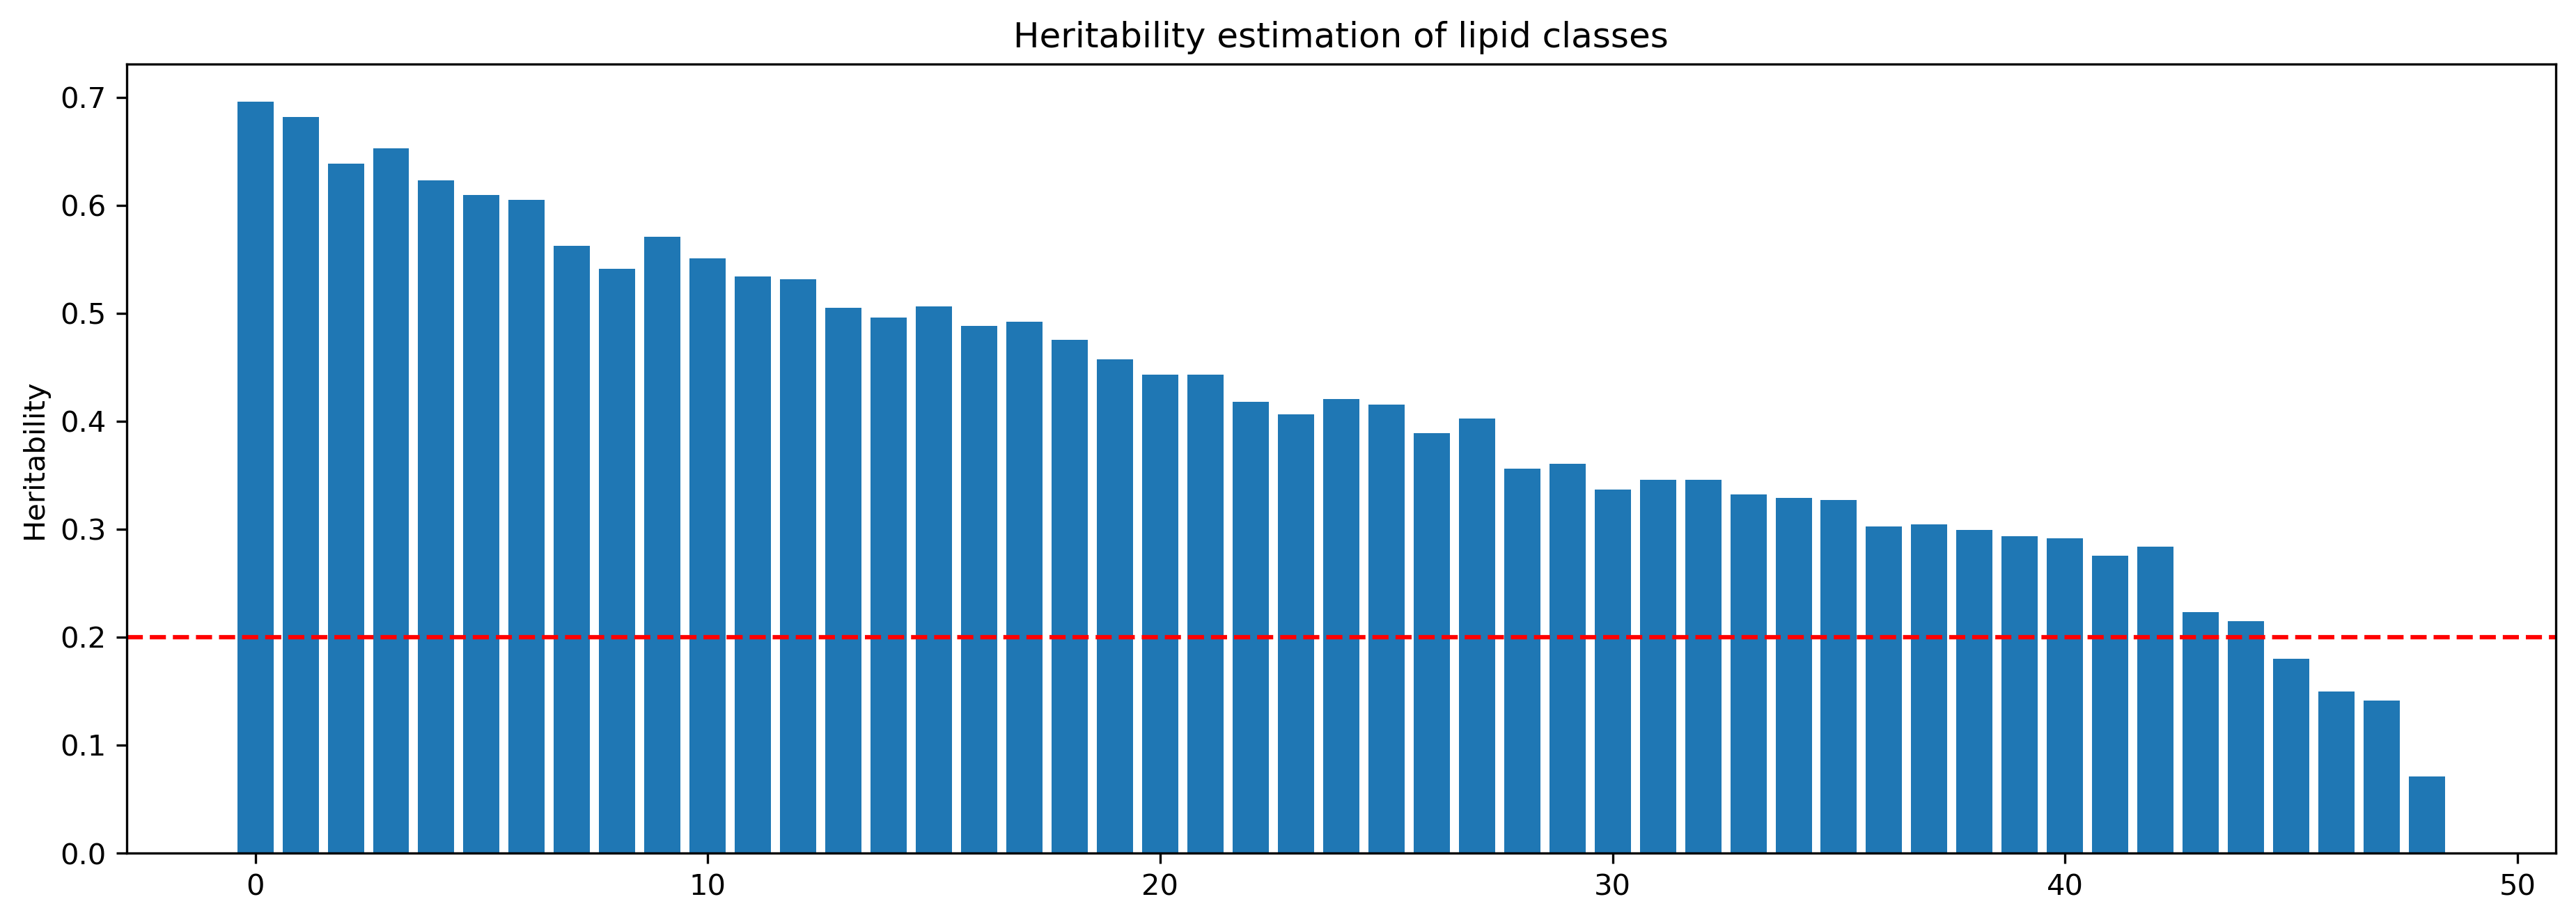

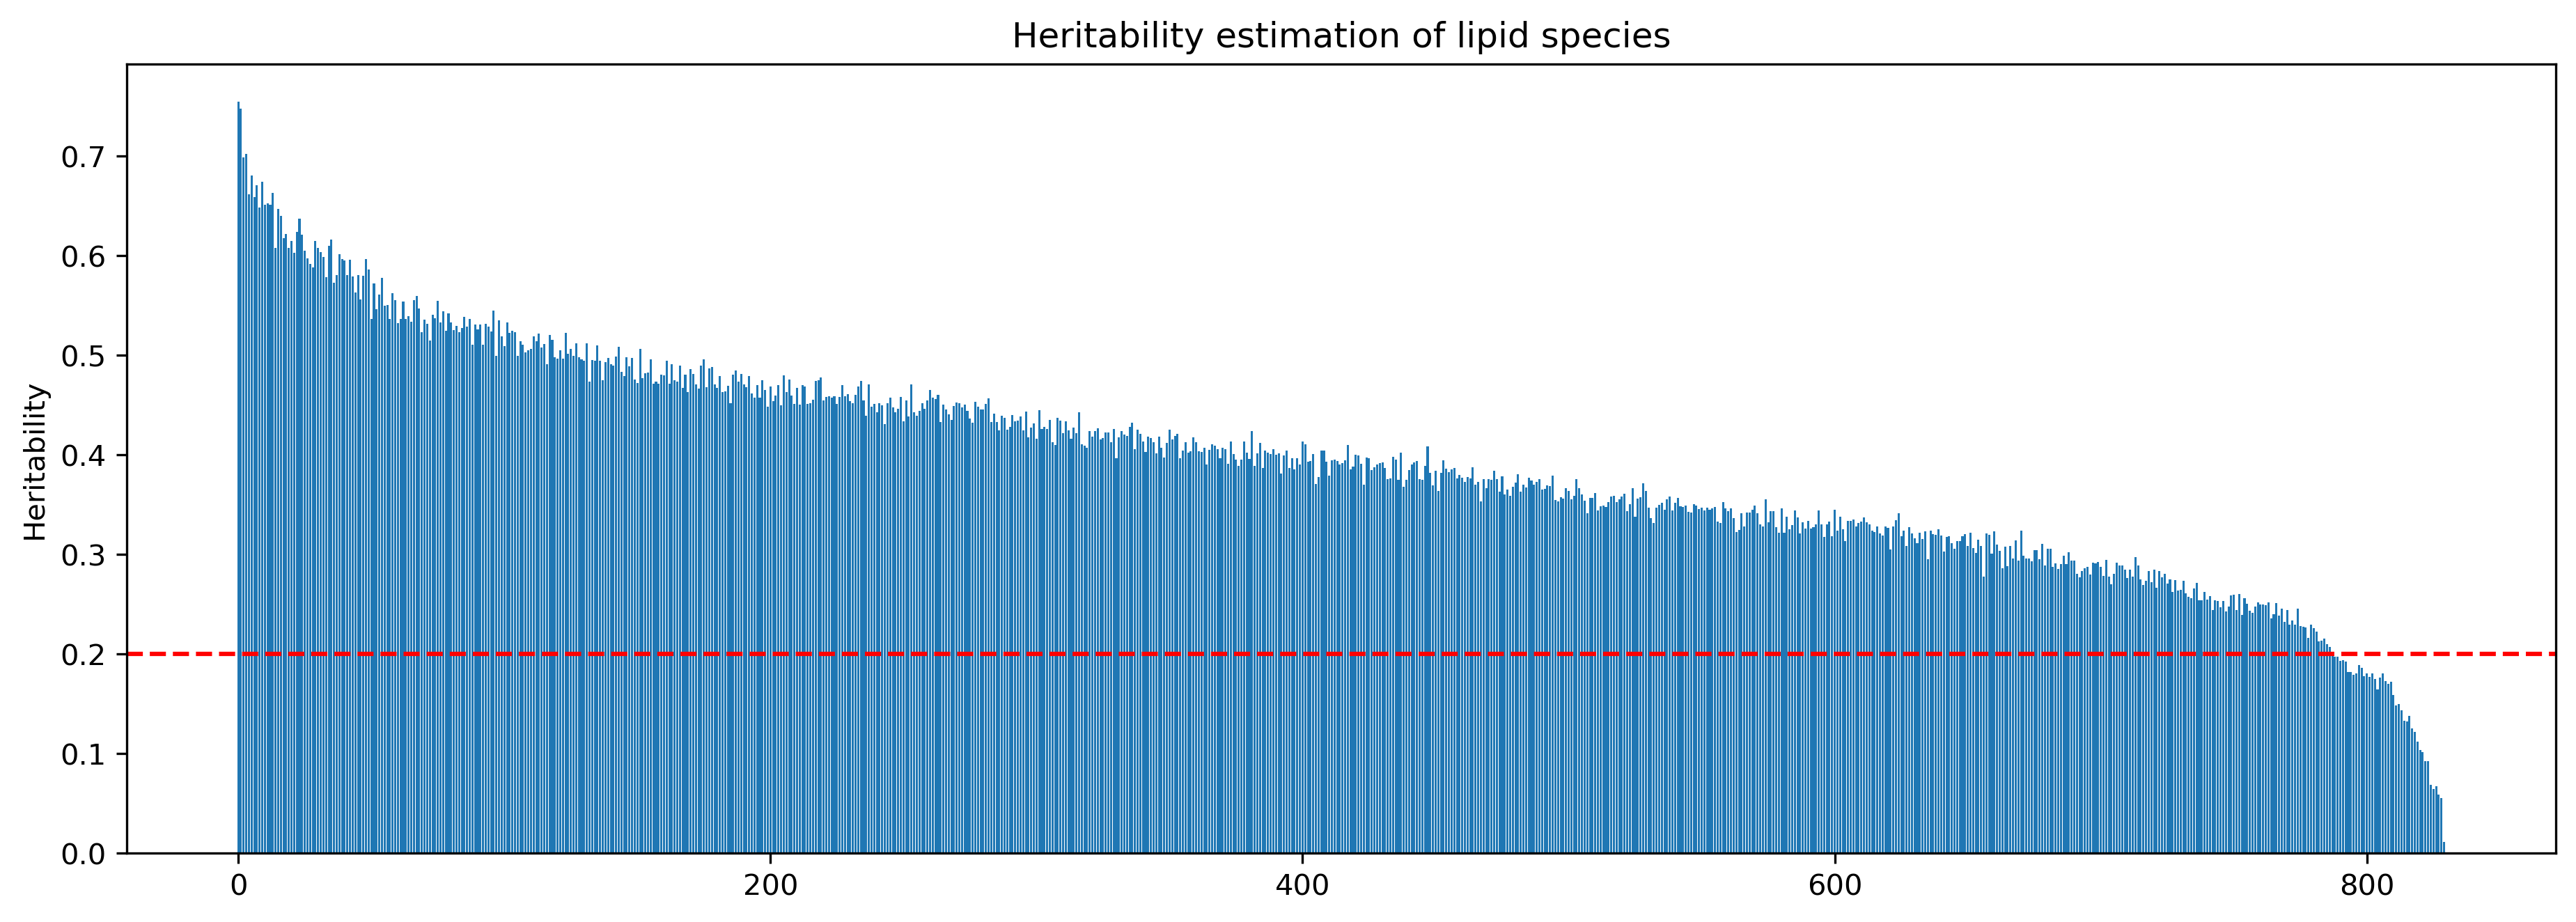

In [2]:
# Plot heritabilities
def get_heritability(dir_to_check):
    '''
    Check *.log files in dir_to_check, store heritability in a dictionary and return it
    '''
    dict_heritability = {} # format is lipid_name:(heritability, pval)
    pattern = r"Heritability\s*=\s*([\d.]+)\s*\(\s*Pval\s*=\s*([\d.e-]+)\s*\)"
    for fn in os.listdir(dir_to_check):
        if fn.endswith('.log'):
            lipid = fn.split('.')[0]
            if lipid.count('-')==2: # Change replaces characters back (space and parentheses)
                lipid = lipid.replace('_', ' ').replace('-', '(', 1).replace('-', ')')
            file_content = open(dir_to_check+fn).read()
            match = re.search(pattern, file_content)
            if match: # if match is not none, ie. find something
                heritability = float(match.group(1))
                p_value = float(match.group(2))
                if not dict_heritability.get(lipid): # If a key is not seen yet
                    dict_heritability[lipid] = (heritability, p_value)
    return dict_heritability

def plot_heritability(df_h, title, heritability_threshold = 0.2):
    '''
    Plot heritability
    df_h: a dataframe containing heritability estimation and p values
            columns are heritability and pval
    '''
    
    df_h.sort_values(by='pval', inplace=True)
    print(f'Entries with heritability < {heritability_threshold}')
    display(df_h[df_h['heritability']<heritability_threshold])

    fig_h, ax_h = plt.subplots(figsize=(15, 5), dpi=300)
    ax_h.bar(range(len(df_h)), df_h['heritability'])
    ax_h.set_title(title)
    ax_h.set_ylabel('Lipid class')
    ax_h.set_ylabel('Heritability')
    ax_h.axhline(y=heritability_threshold, color='r', ls='--')
    return fig_h, ax_h

# Lipid class
dir_lipid_class = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS/'
dict_heritability = get_heritability(dir_to_check = dir_lipid_class)
df_h = pd.DataFrame(dict_heritability).T.rename(columns={0:'heritability', 1:'pval'})
plot_heritability(df_h, title = 'Heritability estimation of lipid classes',
                  heritability_threshold = 0.2)

# Lipid species
dir_lipid_species= '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS/'
dict_heritability = get_heritability(dir_to_check = dir_lipid_species)
df_h = pd.DataFrame(dict_heritability).T.rename(columns={0:'heritability', 1:'pval'})
plot_heritability(df_h, title = 'Heritability estimation of lipid species',
                  heritability_threshold = 0.2)

## 2. Plot GWAS results: qqplot, manhattan plot

In [80]:
df_h.sort_values(by='heritability', ascending=False).head(10)

,heritability,pval
LPC(O),0.695823,1.972690e-22
LPE(P),0.681618,1.067510e-20
PIP1,0.652793,1.522510e-19
S1P,0.638564,6.052310e-20
Hex3Cer,0.623323,3.573230e-17
Sph,0.609627,1.090150e-16
LPC(P),0.605144,1.282950e-15
LPC,0.570816,2.370160e-13
dimethyl-CE,0.562477,1.514400e-13
PC(P),0.551114,2.170560e-12


# LPC-O-.fastGWA


,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
0,1,chr1:10930:G:A,10930,A,G,2096,0.002147,0.320106,0.331340,0.333996
1,1,chr1:10989:G:A,10989,A,G,2096,0.000716,1.251520,0.573074,0.028971
2,1,chr1:11171:CCTTG:C,11171,C,CCTTG,2096,0.021469,0.271064,0.103335,0.008712
3,1,chr1:16375:G:C,16375,C,G,2096,0.000239,-0.400379,0.992120,0.686537
4,1,chr1:20489:G:T,20489,T,G,2096,0.000239,-1.170860,0.992120,0.237938


# Create manhattan plot


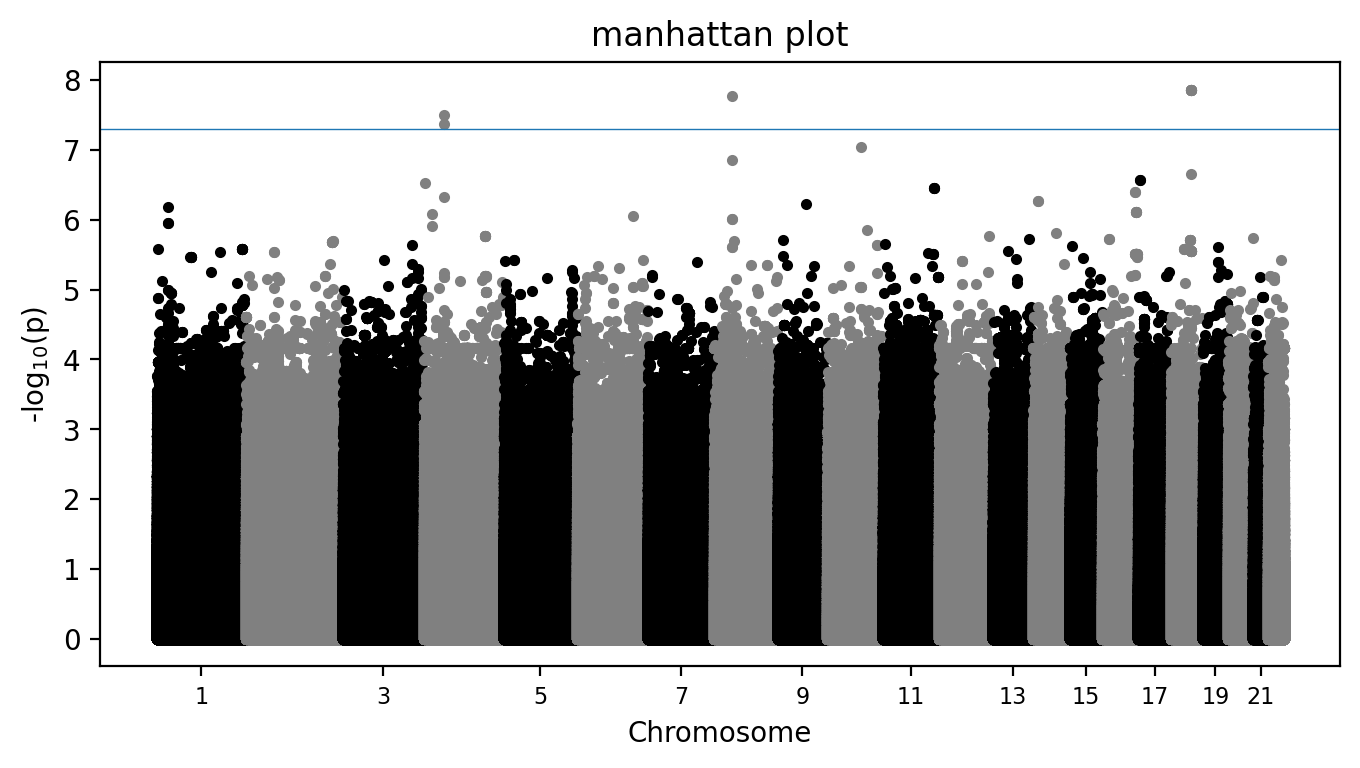

In [75]:
# Plot heritabilities of lipid classes
dir_lipid_class = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS/'

top5 = ['LPC-O-', 'LPE-P-', 'PIP1', 'S1P', 'Hex3Cer']

dir_to_check = dir_lipid_class

lip = top5[0]
fn = f'{lip}.fastGWA'
print(f'# {fn}')
df = pd.read_csv(dir_lipid_class+fn, sep='\t')
display(df.head())

print('# Create manhattan plot')
fig, ax = manhattan_plot(data=df, pval='P', position='POS', chromosome='CHR', sig_pval=0.05/(10**6))
fig.savefig(f'{lip}.jpeg')

# for lip in top5:
#     fn = f'{lip}.fastGWA'
#     print(f'# {fn}')
#     df = pd.read_csv(dir_lipid_class+fn, sep='\t')
#     display(df.head())
#     break


## 3. Manhattan plot and QQ plot of all results
Run in terminal

In [35]:
df_h_class.sort_values('heritability', ascending=False).head(10)

,heritability,pval
LPC(O),0.695823,1.972690e-22
LPE(P),0.681618,1.067510e-20
PIP1,0.652793,1.522510e-19
S1P,0.638564,6.052310e-20
Hex3Cer,0.623323,3.573230e-17
Sph,0.609627,1.090150e-16
LPC(P),0.605144,1.282950e-15
LPC,0.570816,2.370160e-13
dimethyl-CE,0.562477,1.514400e-13
PC(P),0.551114,2.170560e-12


In [32]:
# Create commands
# python 2_GWAS_create_plots.py -i /data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS/Hex3Cer.fastGWA -o /data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_plots/ -ht 0.623323

# Lipid class
dir_lipid_class = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS/'
dir_lip_class_output = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_plots/'
df_h_class = pd.DataFrame(get_heritability(dir_to_check=dir_lipid_class)).T.rename(columns={0:'heritability', 1:'pval'})

# Lipid species
dir_lipid_species= '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS/'
dir_lip_species_output = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_plots/'
df_h_species = pd.DataFrame(get_heritability(dir_to_check=dir_lipid_species)).T.rename(columns={0:'heritability', 1:'pval'})
df_h_species.sort_values(by='heritability', inplace=True, ascending=False)

# ------------------- Save commands for lipid classes -------------------
df_h = df_h_class # Heritability dataframe
dir_in = dir_lipid_class # Directory to input file
dir_output = dir_lip_class_output # Directory to output file
cmf_file = '/data100t1/home/wanying/CCHC/lipidomics/code/vgi02_1.sh'
fh = open(cmf_file, 'w')
for lip in df_h.index:
    heritability = df_h.loc[lip][0]
    lip = lip.replace('/', '-').replace('(','-').replace(')','-').replace(' ','_')
    cmd = f'python 2_GWAS_create_plots.py -i {dir_in}{lip}.fastGWA -o {dir_output} -ht {heritability}'
    # print(cmd)
    fh.write(cmd+'\n')
fh.close()

# ------------------- Save commands for lipid species -------------------
df_h = df_h_species # Heritability dataframe
dir_in = dir_lipid_species # Directory to input file
dir_output = dir_lip_species_output # Directory to output file
cmf_file = '/data100t1/home/wanying/CCHC/lipidomics/code/vgipiper.sh'
fh = open(cmf_file, 'w')
for lip in df_h.index:
    heritability = df_h.loc[lip][0]
    lip = lip.replace('/', '-').replace('(','-').replace(')','-').replace(' ','_')
    cmd = f'python 2_GWAS_create_plots.py -i {dir_in}{lip}.fastGWA -o {dir_output} -ht {heritability}'
    # print(cmd)
    fh.write(cmd+'\n')
fh.close()

### 3.1 Filter hits with pval<10^-5 only
Or 10^-4

run code 2-1_GWAS_filter_suggestive_sig_hits_only.py

In [15]:
# Lipid species
dir_lipid_species= '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS/'
dict_heritability = get_heritability(dir_to_check = dir_lipid_species)
df_h = pd.DataFrame(dict_heritability).T.rename(columns={0:'heritability', 1:'pval'})
output_cmd_file = 'vgipiper_1_all.sh'
fh = open(output_cmd_file, 'w')
for lipid in df_h.index:
    heritability = df_h.loc[lipid][0]
    lipid = lipid.replace('/', '-').replace('(','-').replace(')','-').replace(' ','_')
    input_file = f'{dir_lipid_species}{lipid}.fastGWA'
    output_file = dir_lipid_species[:-1]+'_plots/'
    # print(lipid, heritability)
    cmd = f'python 2-1_GWAS_filter_suggestive_sig_hits_only.py -i {input_file} -o {output_file} -ht {heritability}'
    fh.write(cmd +'\n')
fh.close()

In [18]:
# Lipid class
dir_lipid_species= '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS/'
dict_heritability = get_heritability(dir_to_check = dir_lipid_species)
df_h = pd.DataFrame(dict_heritability).T.rename(columns={0:'heritability', 1:'pval'})
output_cmd_file = 'vgipiper_1_all.sh'
fh = open(output_cmd_file, 'w')
for lipid in df_h.index:
    heritability = df_h.loc[lipid][0]
    lipid = lipid.replace('/', '-').replace('(','-').replace(')','-').replace(' ','_')
    input_file = f'{dir_lipid_species}{lipid}.fastGWA'
    output_file = dir_lipid_species[:-1]+'_snps_pval_1e-4/'
    # print(lipid, heritability)
    cmd = f'python 2-1_GWAS_filter_suggestive_sig_hits_only.py -i {input_file} -o {output_file} -ht {heritability}'
    fh.write(cmd +'\n')
fh.close()

## 4. GWAS only adjust for age, sex and pc1-5
No adjustment of BMI and age2



### 4.1 Get heritability

Entries with heritability < 0.2


,heritability,pval
deDE,0.191658,0.005103
FFA,0.168050,0.010965
AC,0.136162,0.038017
AC-OH,0.129957,0.046624
BA,0.100279,0.111438


Entries with heritability < 0.2


,heritability,pval
PE-O-16:0-22:4-,0.199622,0.002254
AC-18:1--OH,0.199378,0.002569
PE-O-16:0-20:3-,0.186894,0.002723
PE(36:0),0.193167,0.002961
PC-42:6-_-a-,0.187956,0.004049
PA(36:4),0.186480,0.004162
GM3-d18:2-24:1-,0.195579,0.004398
FA(14:0),0.182645,0.004661
AC(22:6),0.187265,0.004884
deDE(18:2),0.191658,0.005103


(<Figure size 4500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'Heritability estimation of lipid species'}, ylabel='Heritability'>)

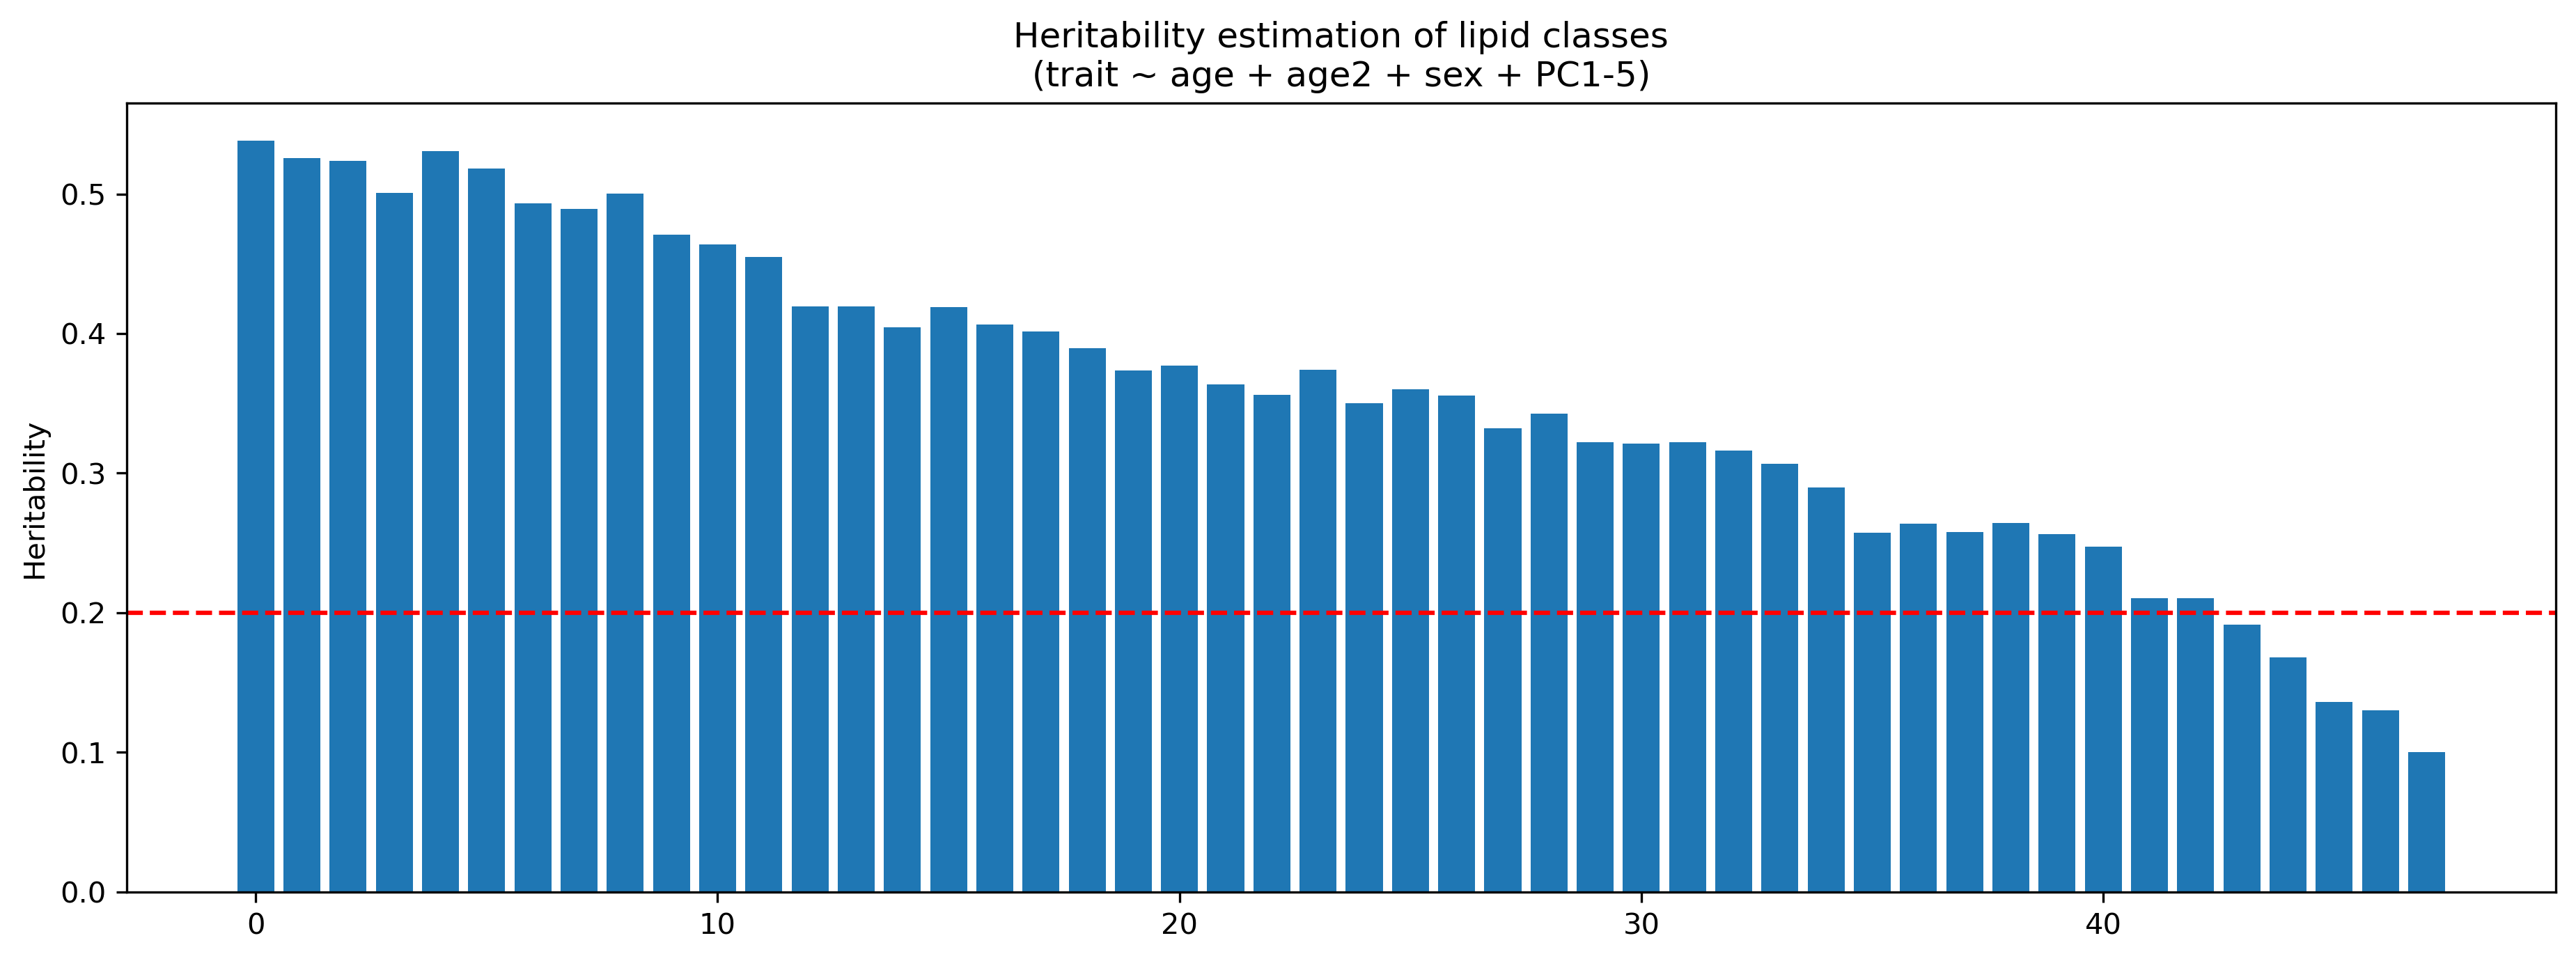

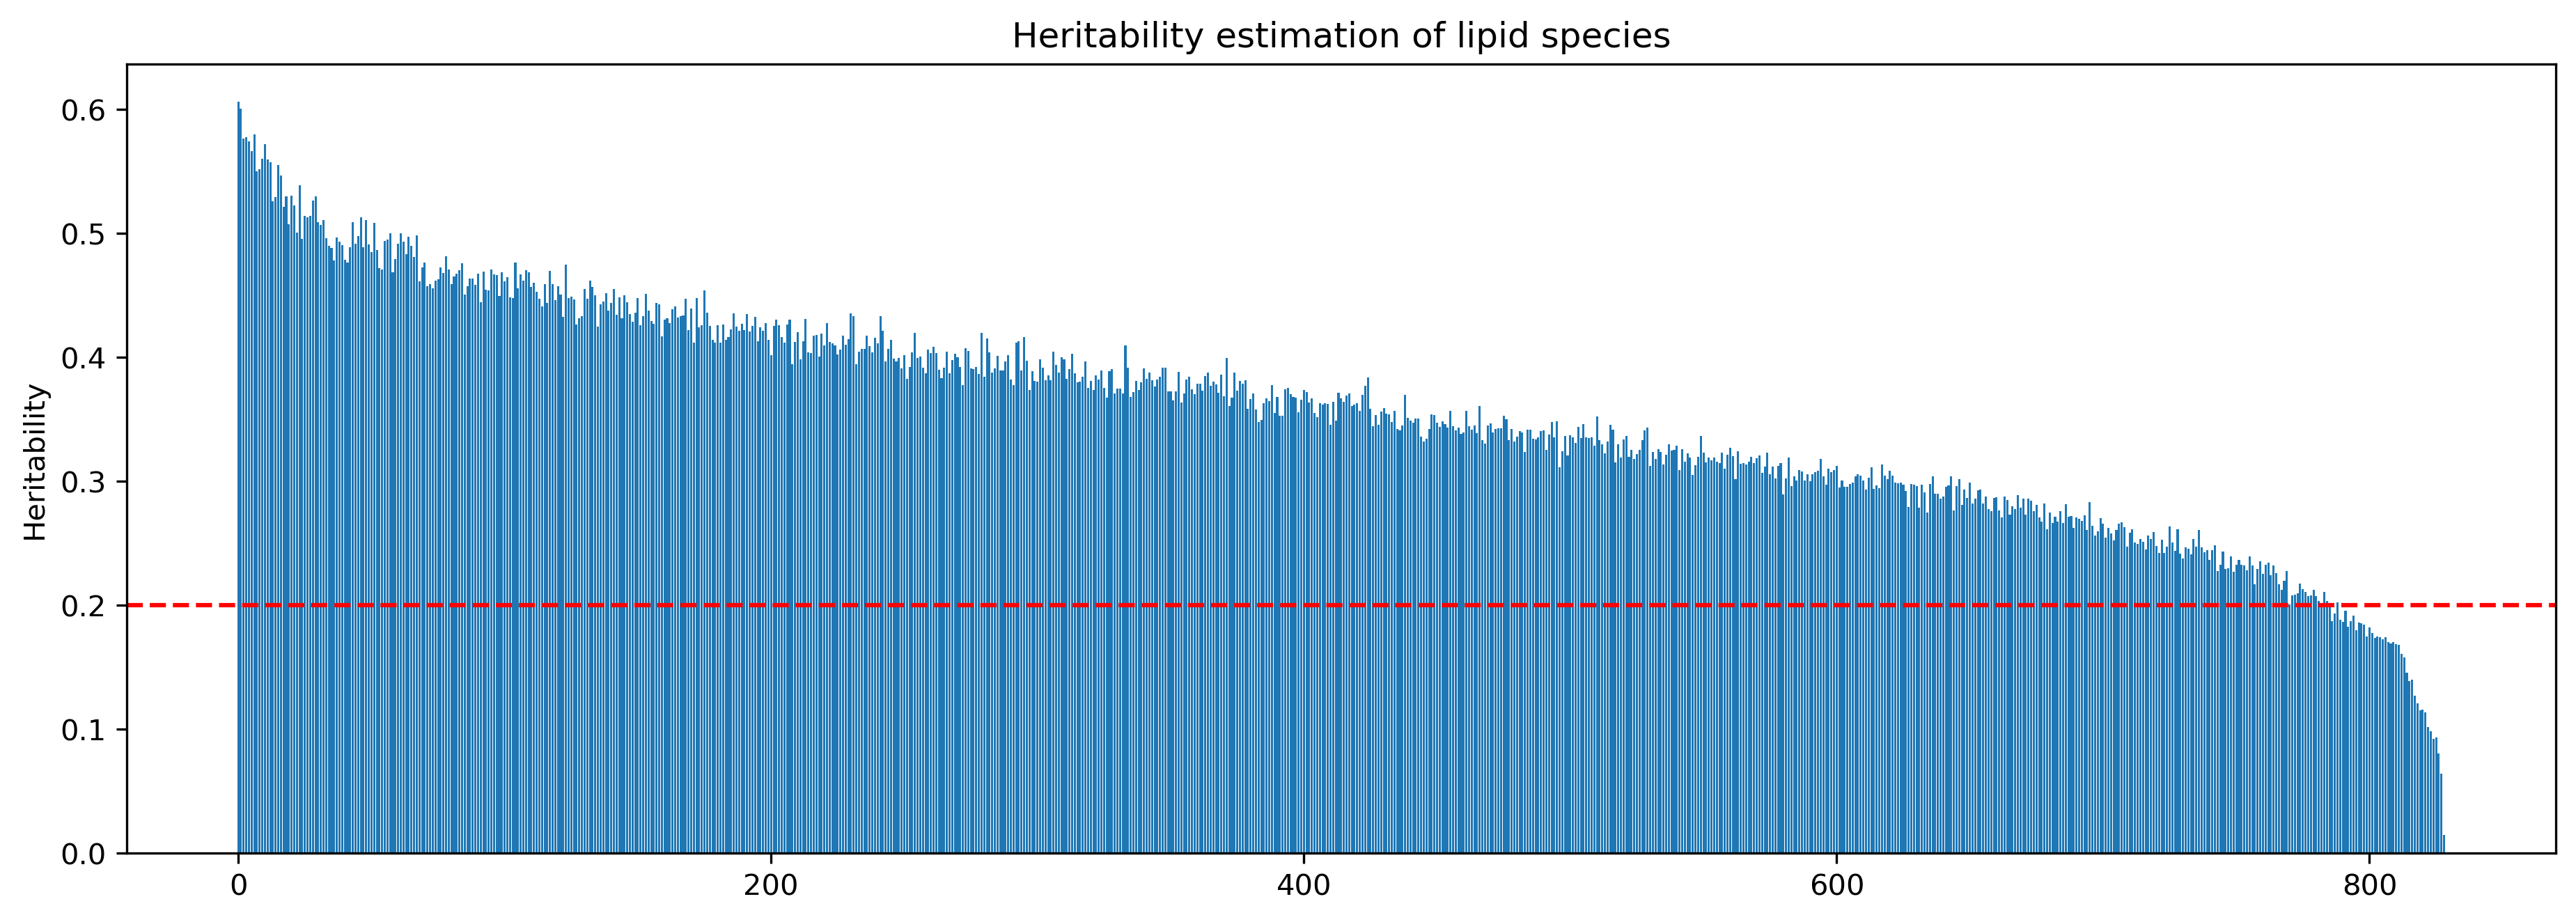

In [5]:
# Plot heritabilities
def get_heritability(dir_to_check):
    '''
    Check *.log files in dir_to_check, store heritability in a dictionary and return it
    '''
    dict_heritability = {} # format is lipid_name:(heritability, pval)
    pattern = r"Heritability\s*=\s*([\d.]+)\s*\(\s*Pval\s*=\s*([\d.e-]+)\s*\)"
    for fn in os.listdir(dir_to_check):
        if fn.endswith('.log'):
            lipid = fn.split('.')[0]
            if lipid.count('-')==2: # Change replaces characters back (space and parentheses)
                lipid = lipid.replace('_', ' ').replace('-', '(', 1).replace('-', ')')
            file_content = open(dir_to_check+fn).read()
            match = re.search(pattern, file_content)
            if match: # if match is not none, ie. find something
                heritability = float(match.group(1))
                p_value = float(match.group(2))
                if not dict_heritability.get(lipid): # If a key is not seen yet
                    dict_heritability[lipid] = (heritability, p_value)
    return dict_heritability

def plot_heritability(df_h, title, heritability_threshold = 0.2):
    '''
    Plot heritability
    df_h: a dataframe containing heritability estimation and p values
            columns are heritability and pval
    '''
    
    df_h.sort_values(by='pval', inplace=True)
    print(f'Entries with heritability < {heritability_threshold}')
    display(df_h[df_h['heritability']<heritability_threshold])

    fig_h, ax_h = plt.subplots(figsize=(15, 5), dpi=300)
    ax_h.bar(range(len(df_h)), df_h['heritability'])
    ax_h.set_title(title)
    ax_h.set_ylabel('Lipid class')
    ax_h.set_ylabel('Heritability')
    ax_h.axhline(y=heritability_threshold, color='r', ls='--')
    return fig_h, ax_h

# Lipid class
dir_lipid_class = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_noadj_BMI_AGE2/'
dict_heritability = get_heritability(dir_to_check = dir_lipid_class)
df_h = pd.DataFrame(dict_heritability).T.rename(columns={0:'heritability', 1:'pval'})
plot_heritability(df_h, title = 'Heritability estimation of lipid classes\n(trait ~ age + age2 + sex + PC1-5)',
                  heritability_threshold = 0.2)

# Lipid species
dir_lipid_species= '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_noadj_BMI_AGE2/'
dict_heritability = get_heritability(dir_to_check = dir_lipid_species)
df_h = pd.DataFrame(dict_heritability).T.rename(columns={0:'heritability', 1:'pval'})
plot_heritability(df_h, title = 'Heritability estimation of lipid species',
                  heritability_threshold = 0.2)

In [7]:
# df_h.reset_index().rename(columns={'index':'lipid'}).to_csv('/data100t1/home/wanying/CCHC/lipidomics/output/heritability_lipid_species_noadj_BMI_AGE2.txt',
#             sep='\t', index=False)


### 4.2 Create plots

python 2_GWAS_create_plots.py -i /data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_noadj_BMI/LPE-P-.fastGWA -o /data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_noadj_BMI_plots/ -ht 0.542839

In [33]:
# Lipid species
dict_heritability = get_heritability(dir_to_check = dir_lipid_species)
df_h = pd.DataFrame(dict_heritability).T.rename(columns={0:'heritability', 1:'pval'})
output_cmd_file = 'vgipiper_1_all.sh'
fh = open(output_cmd_file, 'w')
for lipid in df_h.index:
    heritability = df_h.loc[lipid][0]
    lipid = lipid.replace('/', '-').replace('(','-').replace(')','-').replace(' ','_')
    input_file = f'{dir_lipid_species}{lipid}.fastGWA'
    output_file = dir_lipid_species[:-1]+'_plots/'
    # print(lipid, heritability)
    cmd = f'python 2_GWAS_create_plots.py -i {input_file} -o {output_file} -ht {heritability}'
    fh.write(cmd +'\n')
fh.close()

In [29]:
# This lipid species is missed due to '\' in the file name
# Run it mannually
"PI(15-MHDA_20:4)\PI(17:0_20:4)".replace('/', '-').replace('(','-').replace(')','-').replace(' ','_')

'PI-15-MHDA_20:4-\\PI-17:0_20:4-'

## 5. Manhattan plot of all lipid species and classes
* Refer to this paper https://www.nature.com/articles/s41467-019-11954-8

Tabassum, R., Rämö, J.T., Ripatti, P. et al. Genetic architecture of human plasma lipidome and its link to cardiovascular disease. Nat Commun 10, 4329 (2019).


* Hits with pval<10^-5 are plotted in my plot

In [95]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# Modified manhattan plot
def manhattan_plot_multiple_gwas(data: pd.core.frame.DataFrame, pval: str='pval', position: str='pos',
                   chromosome: str='chr', gene: str='', title: str='manhattan plot',
                   sig_pval: float=-1, annotate: bool=False, colors: list=['black','grey'],
                   dpi: float=200, figsize: tuple=(8,4), index: bool=False, known: bool=False):
    '''
    Plot Manhattan plot from summary statistics of multiple GWASs
    Params
    - data: A dataframe containing summary statistics of multiple GWASs. Filter SNPs by pvalue first, such as pval<10^-5
    - pval: column name of p values
    - position: column name of position
    - chromosome: column name of chromosome
    - gene: column of gene names for annotation (only used if annotate=True)
    - title: figure title
    - sig_pval: threshold of significant p value (No multiple testing correction will be applied on this threshold)
                Default values -1 implies 0.05/number_of_tests is used.
    - annotate: anotate significant points (BF correction)
    - colors: list of colors to plot each chromosome. Default is ['black','grey']
    - dpi, figsize: resolution and figure size
    - index: if the input dataframe needs to be reindexed (arbitraty indices for plotting). Column header of index column must be 'indx'
    - known: Whether to plot known hits. defined by 'CAT' column ('known')
    Return
    - fig, ax
    '''
    if annotate: # If name of gene column is provided
        data_copy = data[[gene, chromosome, position, pval]].sort_values(by=[chromosome, position, pval]).copy()
    else:
        if known: # Hightlight known hits (pvals are from other studies)
            if index: # Hightlight known hits (pvals are from other studies)
                data_copy = data[[chromosome, position, pval, 'indx', 'CAT']].sort_values(by=[chromosome, position, pval]).copy()
            else:
                data_copy = data[[chromosome, position, pval, 'CAT']].sort_values(by=[chromosome, position, pval]).copy()
        else:
            data_copy = data[[chromosome, position, pval]].sort_values(by=[chromosome, position, pval]).copy()
    
    if not index:
        # Create arbitrary indices for plotting. Same position share the same index value
        indx, curr_pos, lst_indx = 0, 0, [] # lst_indx stores indices for each posiiont
        for row in range(len(data_copy)): # Assume input dataframe has clean row index starting from 0
            if curr_pos != data_copy.loc[row, position]: # Keep track of current posiont
                curr_pos = data_copy.loc[row, position]
                indx += 1
            lst_indx.append(indx)
            if row%1000000 == 0: print(f'{row} rows processed, index={indx}', flush=True)
            elif row%10000 == 0: print('.', end='', flush=True)
        print(f'{row} rows processed, index ={indx}', flush=True)
        data_copy['indx'] = lst_indx
    
    data_copy['log_pval'] = -np.log10(data_copy[pval]) # Plot -log10 pvalues
    label_text, label_pos = [], [] # Keep track of label text and label positions
    grouped = data_copy.groupby(by=chromosome)
    
    fig, ax = plt.subplots(dpi=dpi, figsize=figsize)
    count=0
    for chr_num, df in grouped: # Plot each group (grouped by chromosome)
        label_text.append(chr_num)
        label_pos.append(df['indx'].mean())
        ax.plot(df['indx'], df['log_pval'], ls='', marker='.', color=colors[count%len(colors)], markersize=2)
        # ax.plot(df['indx'], df['log_pval'], ls='', marker='.', color=colors[count%len(colors)])
        count += 1
        
    if known: # Hightlight known hits (pvals are from other studies)
        df_known = data_copy[(data_copy['CAT']=='known') & (data_copy[pval]<=sig_pval)]
        ax.plot(df_known['indx'], df_known['log_pval'], ls='', marker='.', color='red', markersize=1)
        
    if title is not None: ax.set_title(title)
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('-$log_{10}(p)$')
    
    # Plot significant line of p value
    if sig_pval == -1: sig_pval = 0.05/len(data_copy)
    ax.axhline(y=-np.log10(sig_pval), lw=0.5)
    ax.set_xticks([label_pos[i] for i in range(0, len(label_pos), 2)])
    ax.set_xticklabels([label_text[i] for i in range(0, len(label_text), 2)], fontsize='8')
    
    if annotate:
        if gene=='': raise ValueError('name of gene column cannot be empty')
        sig_points = data_copy[data_copy[pval]<=(sig_pval)] # Significant data points
        for i in range(len(sig_points)):
            tmp = sig_points.iloc[[i],:] # Cut the temp data for plotting
            ax.annotate(text=tmp[gene].values[0],
                        xy=(tmp['indx'].values[0], tmp['log_pval'].values[0]), fontsize='5')
    
    return fig, ax, data_copy


### 5.1 Plots

0 rows processed, index=1
...................................................................................................1000000 rows processed, index=348811
...................................................................................................2000000 rows processed, index=697923
...................................................................................................3000000 rows processed, index=1053104
...................................................................................................4000000 rows processed, index=1241087
...................................................................................................5000000 rows processed, index=1578351
............................................................5606269 rows processed, index =1787226


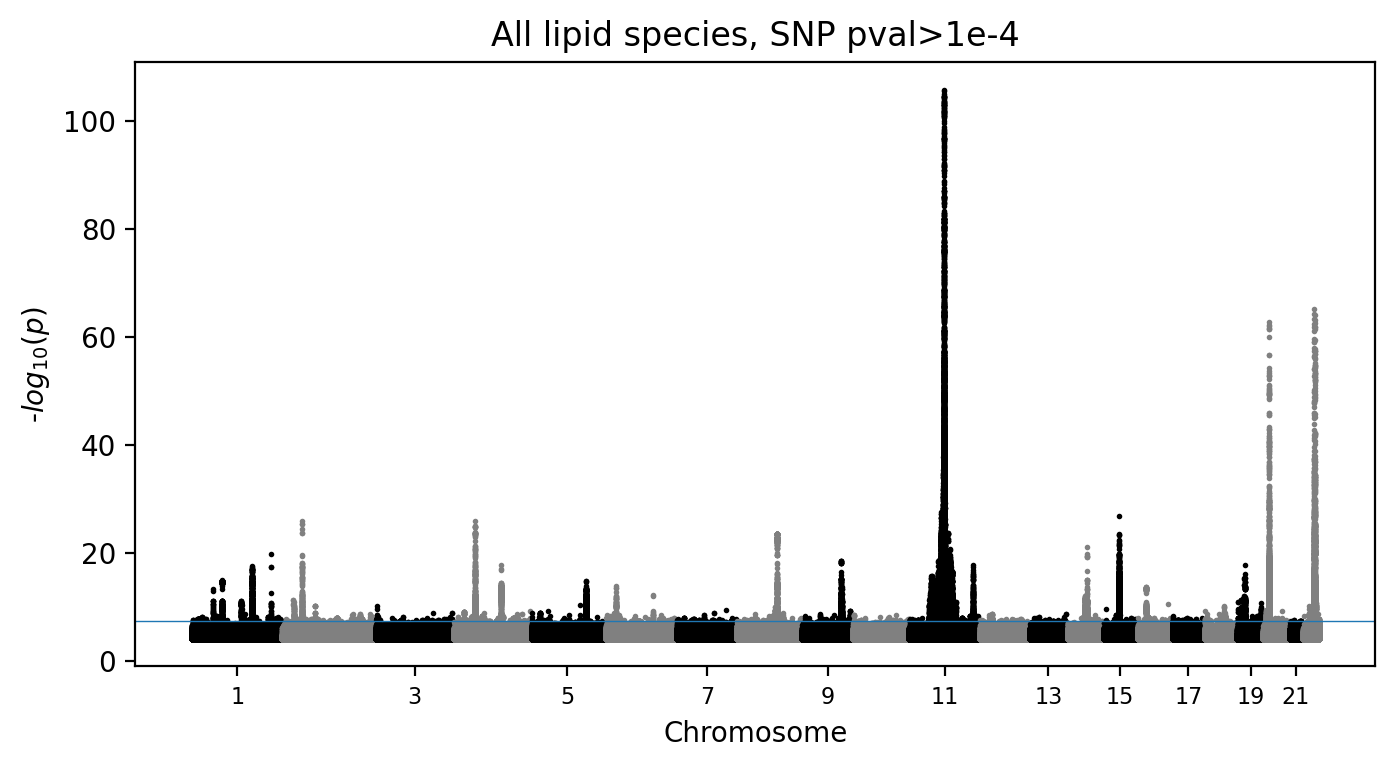

In [13]:
# Read in GWAS results of all lipid species
# Already filtered hits with pval <10^-5 and 10^-4

df_lst =[] # to store all filtered gwas result
dir_gwas_hits = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_plots/'
for fn in os.listdir(dir_gwas_hits):
    if fn.endswith('.txt'):
        lipid = fn.split('_suggestive_sig_SNPs.txt')[0]
        df = pd.read_csv(dir_gwas_hits+fn, sep='\t')
        df['LIPID'] = lipid
        df_lst.append(df)

df_all_species = pd.concat(df_lst)
df_all_species.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_all_species.reset_index(drop=True, inplace=True)

f, a, df = manhattan_plot_multiple_gwas(data=df_all_species, pval='P', position='POS',
                                        chromosome='CHR', sig_pval=0.05/(10**6), title='All lipid species, SNP pval<1e-4')
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4.jpg'
f.savefig(fig_output_fn)

0 rows processed, index=1
...............................................................................793338 rows processed, index =230399


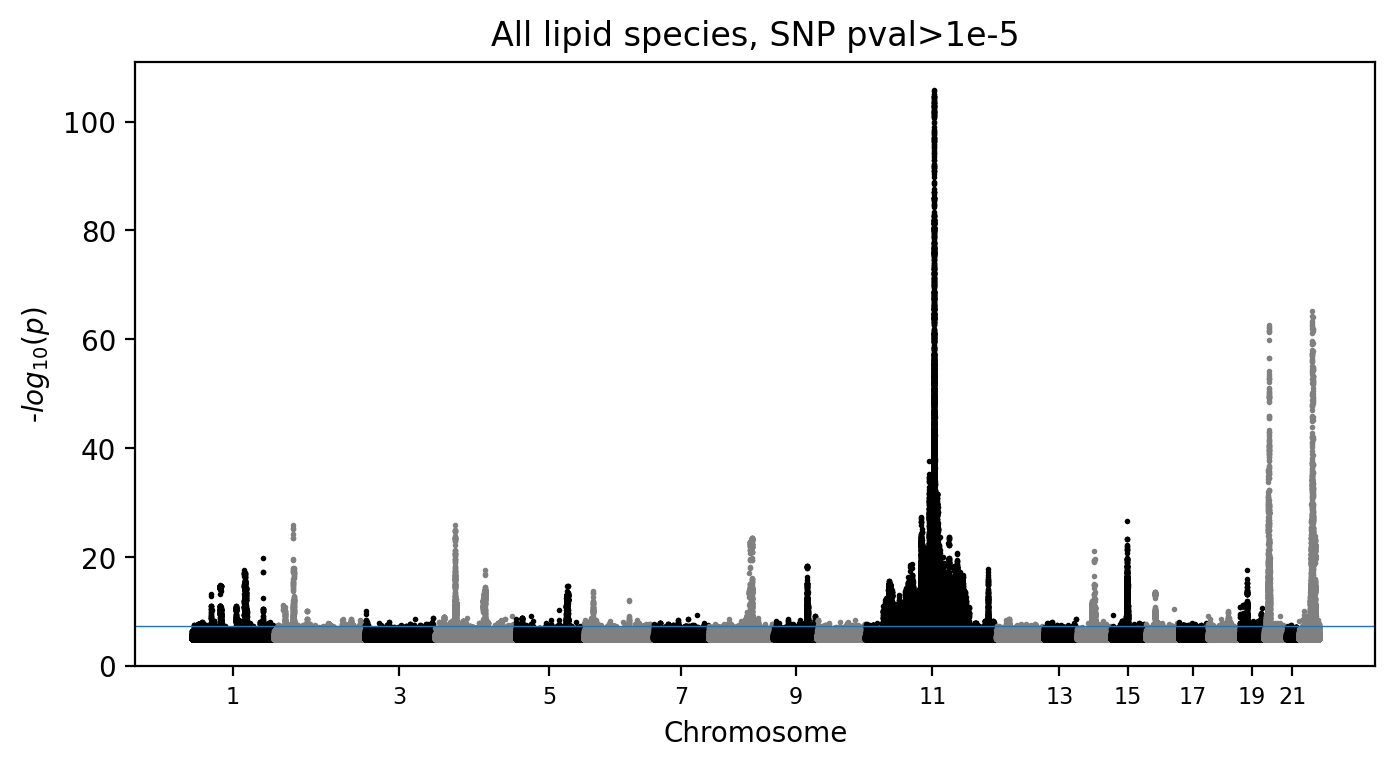

In [16]:
# Plot pval<10^-5 snps
df_lst =[] # to store all filtered gwas result
dir_gwas_hits = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_plots_snps_pval_1e-5/'
for fn in os.listdir(dir_gwas_hits):
    if fn.endswith('.txt'):
        lipid = fn.split('_suggestive_sig_SNPs.txt')[0]
        df = pd.read_csv(dir_gwas_hits+fn, sep='\t')
        df['LIPID'] = lipid
        df_lst.append(df)

df_all_species = pd.concat(df_lst)
df_all_species.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_all_species.reset_index(drop=True, inplace=True)

f2, a2, df2 = manhattan_plot_multiple_gwas(data=df_all_species, pval='P', position='POS',
                                        chromosome='CHR', sig_pval=0.05/(10**6), title='All lipid species, SNP pval<1e-5')
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-5.jpg'
f2.savefig(fig_output_fn)

0 rows processed, index=1
...35502 rows processed, index =31290


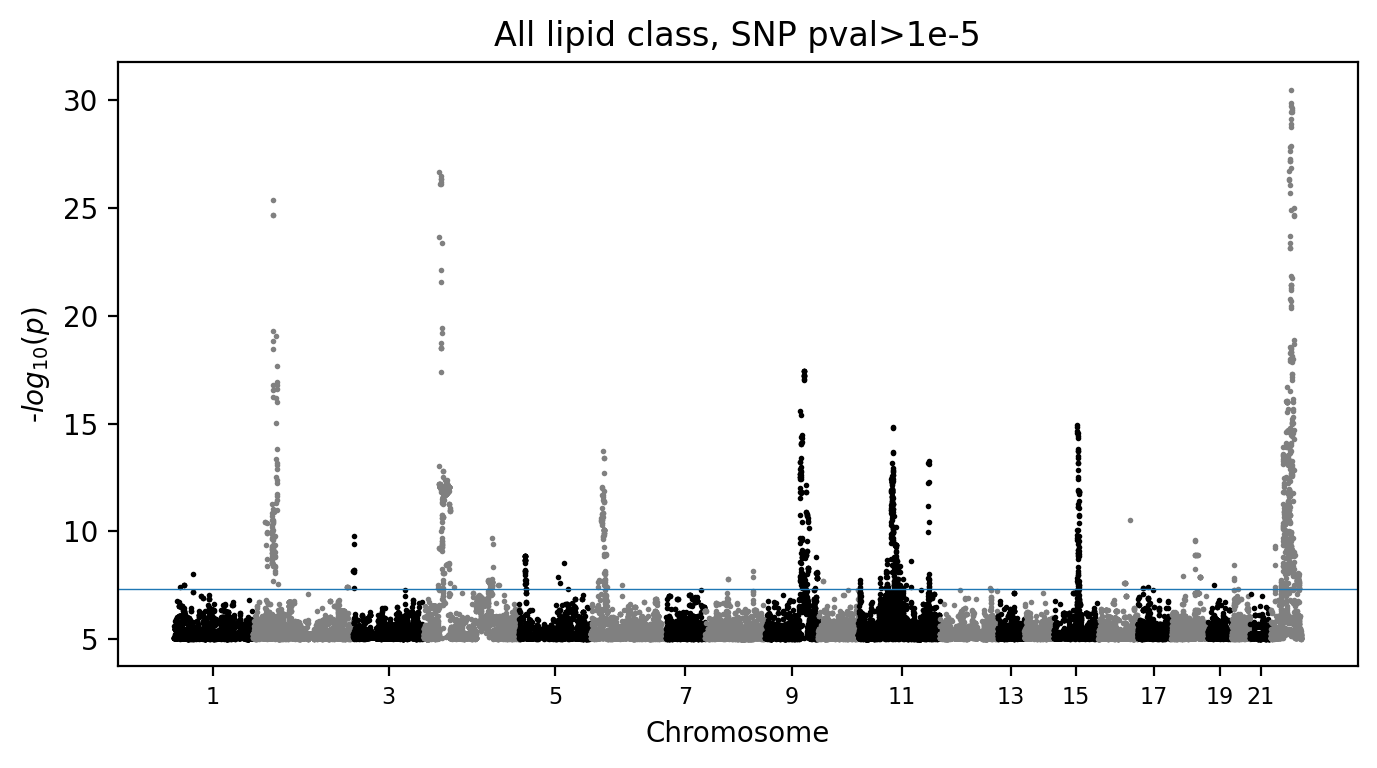

In [17]:
# Plot lipid class, pval<10^-5 snps
df_lst =[] # to store all filtered gwas result
dir_gwas_hits = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_plots/'
for fn in os.listdir(dir_gwas_hits):
    if fn.endswith('.txt'):
        lipid = fn.split('_suggestive_sig_SNPs.txt')[0]
        df = pd.read_csv(dir_gwas_hits+fn, sep='\t')
        df['LIPID'] = lipid
        df_lst.append(df)

df_all_species = pd.concat(df_lst)
df_all_species.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_all_species.reset_index(drop=True, inplace=True)

f3, a3, df3 = manhattan_plot_multiple_gwas(data=df_all_species, pval='P', position='POS',
                                        chromosome='CHR', sig_pval=0.05/(10**6), title='All lipid class, SNP pval<1e-5')
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_class_all_pval_1e-5.jpg'
f3.savefig(fig_output_fn)

0 rows processed, index=1
...........................276051 rows processed, index =191037


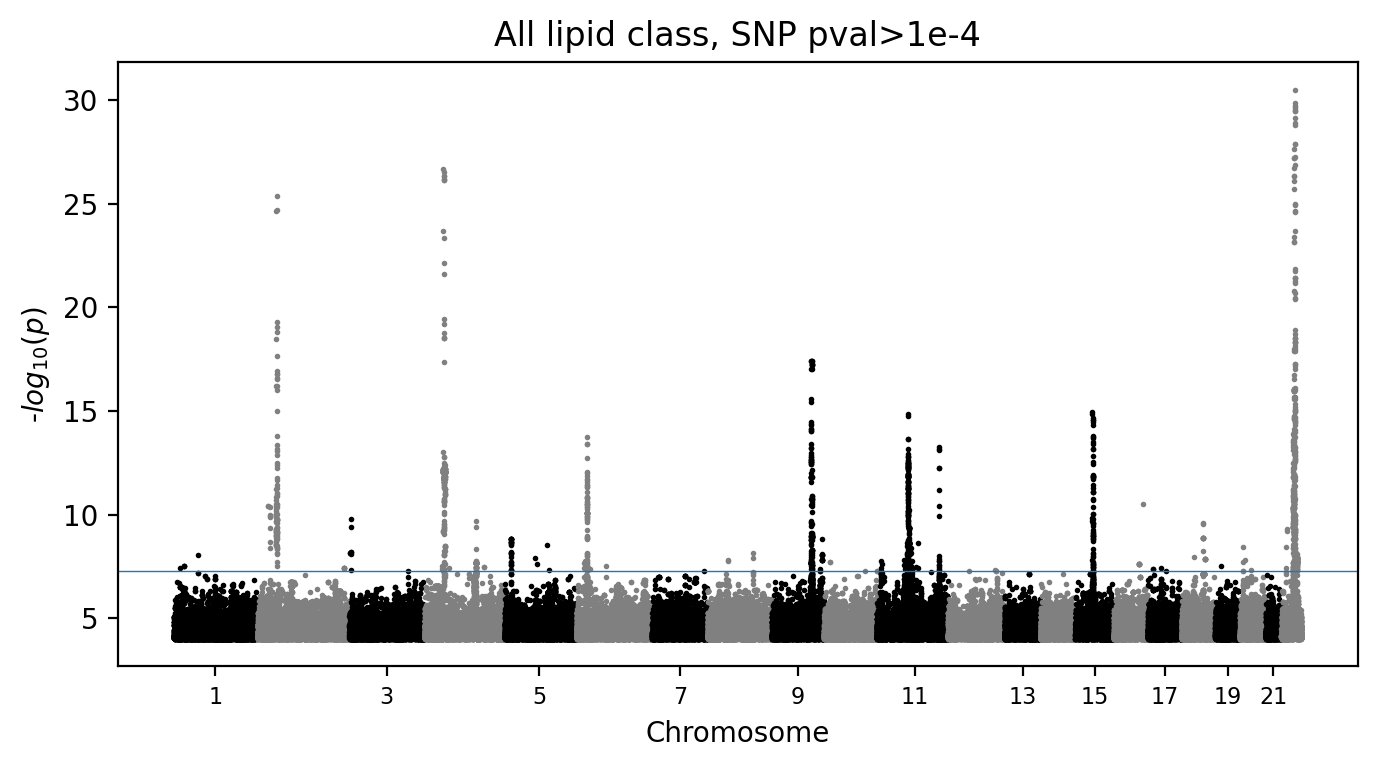

In [31]:
# Plot lipid class, pval<10^-5 snps
df_lst =[] # to store all filtered gwas result
dir_gwas_hits = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_snps_pval_1e-4/'
for fn in os.listdir(dir_gwas_hits):
    if fn.endswith('.txt'):
        lipid = fn.split('_suggestive_sig_SNPs.txt')[0]
        df = pd.read_csv(dir_gwas_hits+fn, sep='\t')
        df['LIPID'] = lipid
        df_lst.append(df)

df_all_species = pd.concat(df_lst)
df_all_species.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_all_species.reset_index(drop=True, inplace=True)

f4, a4, df4 = manhattan_plot_multiple_gwas(data=df_all_species, pval='P', position='POS',
                                        chromosome='CHR', sig_pval=0.05/(10**6), title='All lipid class, SNP pval<1e-4')
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_class_all_pval_1e-4.jpg'
f4.savefig(fig_output_fn)

### 5.2 Label novel hits

In [64]:
# For now just have one dataset available from https://metabolomics.baker.edu.au/pheweb_standard/top_hits
# Will try to download more
fn_known_hits = '/data100t1/home/wanying/CCHC/lipidomics/input_docs/known_hits/Cadby_2021_Nat_Commun_b38.txt'
known_lipidomic_hits = pd.read_csv(fn_known_hits, sep='\t')
known_lipidomic_hits.rename(columns={'pval':'P'}, inplace=True)
known_lipidomic_hits.head()

,CHR,POS,ref,alt,rsID,P,nearest_genes
0,1,2368718,C,A,rs12070927,5.000000e-07,MORN1
1,1,3691942,G,A,rs759172324,3.600000e-07,TP73
2,1,4302687,T,C,rs77897177,1.100000e-07,AJAP1
3,1,4481450,C,T,rs543371768,4.800000e-07,AJAP1
4,1,4507098,G,A,rs350163,1.200000e-08,AJAP1


,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,LIPID,ref,alt,rsID,nearest_genes,CAT
0,1,chr1:889226:C:T,889226,T,C,2096.0,0.000954,-1.81871,0.465133,0.000092,AC,NaN,NaN,NaN,NaN,left_only
1,1,chr1:895359:C:T,895359,T,C,2096.0,0.001193,-1.65287,0.416127,0.000071,AC,NaN,NaN,NaN,NaN,left_only
2,1,chr1:897429:T:G,897429,G,T,2096.0,0.003101,-1.06848,0.258566,0.000036,AC,NaN,NaN,NaN,NaN,left_only
3,1,chr1:900362:A:G,900362,G,A,2096.0,0.003101,-1.06848,0.258566,0.000036,AC,NaN,NaN,NaN,NaN,left_only
4,1,chr1:901923:G:A,901923,A,G,2096.0,0.003101,-1.06848,0.258566,0.000036,AC,NaN,NaN,NaN,NaN,left_only


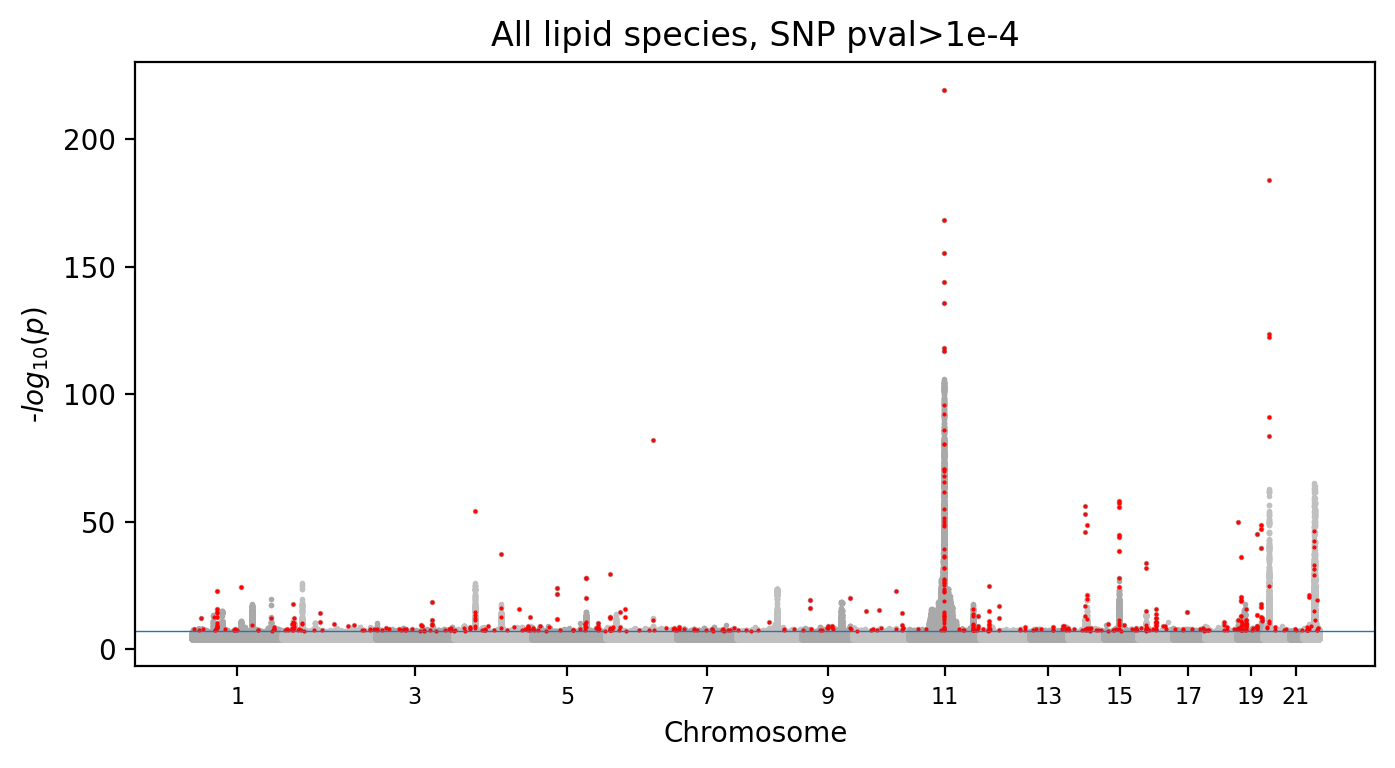

In [106]:
# Read in GWAS results of all lipid species
# Already filtered hits with pval <10^-5 and 10^-4

df_lst =[] # to store all filtered gwas result
dir_gwas_hits = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_plots/'
for fn in os.listdir(dir_gwas_hits):
    if fn.endswith('.txt'):
        lipid = fn.split('_suggestive_sig_SNPs.txt')[0]
        df = pd.read_csv(dir_gwas_hits+fn, sep='\t')
        df['LIPID'] = lipid
        df_lst.append(df)

df_all_species = pd.concat(df_lst)
df_all_species.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_all_species.reset_index(drop=True, inplace=True)

# df: Lipid species, GWAS NP with pval<10^-4 (check plotting code above)
# Merge known with my results
df = df_all_species
df_merged = df.merge(known_lipidomic_hits, on=['CHR', 'POS', 'P'], how='outer', indicator=True)
df_merged.rename(columns={'_merge':'CAT'}, inplace=True)
df_merged['CAT'] = df_merged['CAT'].replace(['right_only', 'both'], 'known')
df_merged.sort_values(by=['CHR', 'POS'], inplace=True)
df_merged.reset_index(drop=True, inplace=True)
df_merged.head()

f, a, df = manhattan_plot_multiple_gwas(data=df_merged, pval='P', position='POS', chromosome='CHR',
                                        sig_pval=0.05/(10**6), title='All lipid species, SNP pval<1e-4',
                                        known=True, colors=['darkgrey', 'silver'])
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_knwon_highlighted.jpg'
f.savefig(fig_output_fn)

# f, a, df = manhattan_plot_multiple_gwas(data=df, index=True, pval='P', position='POS', chromosome='CHR',
#                                         sig_pval=0.05/(10**6), title='All lipid species, SNP pval>1e-4',
#                                         known=True, colors=['darkgrey', 'silver'])
# fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_knwon_highlighted.jpg'
# f.savefig(fig_output_fn)

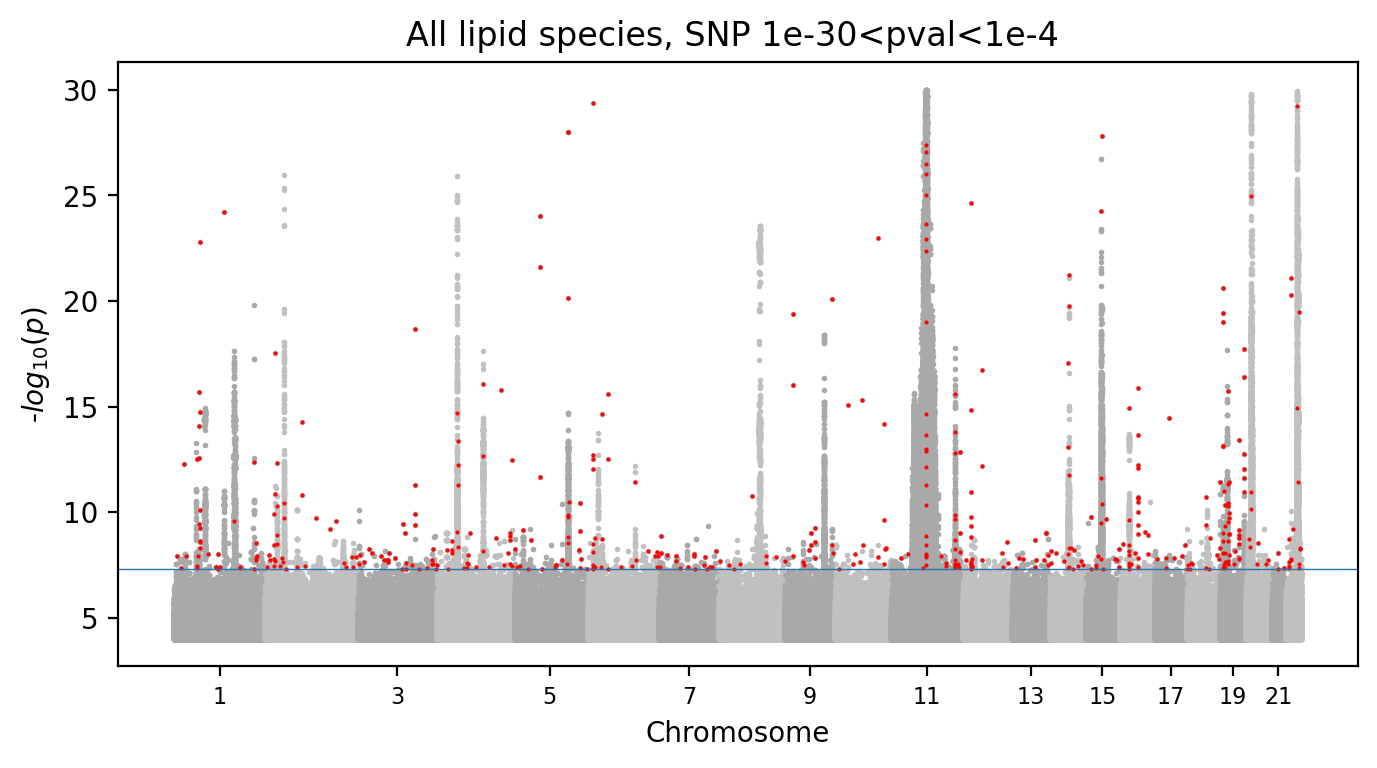

In [107]:
# Constraint pval to be less not less than 10^-30

threshold=1e-30
f, a, df_constraint = manhattan_plot_multiple_gwas(data=df[df['P']>=threshold], index=True, pval='P', position='POS', chromosome='CHR',
                                                   sig_pval=0.05/(10**6), title=f'All lipid species, SNP {threshold}<pval<1e-4 ',
                                                   known=True, colors=['darkgrey', 'silver'])
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_knwon_highlighted_constraint.jpg'
f.savefig(fig_output_fn)

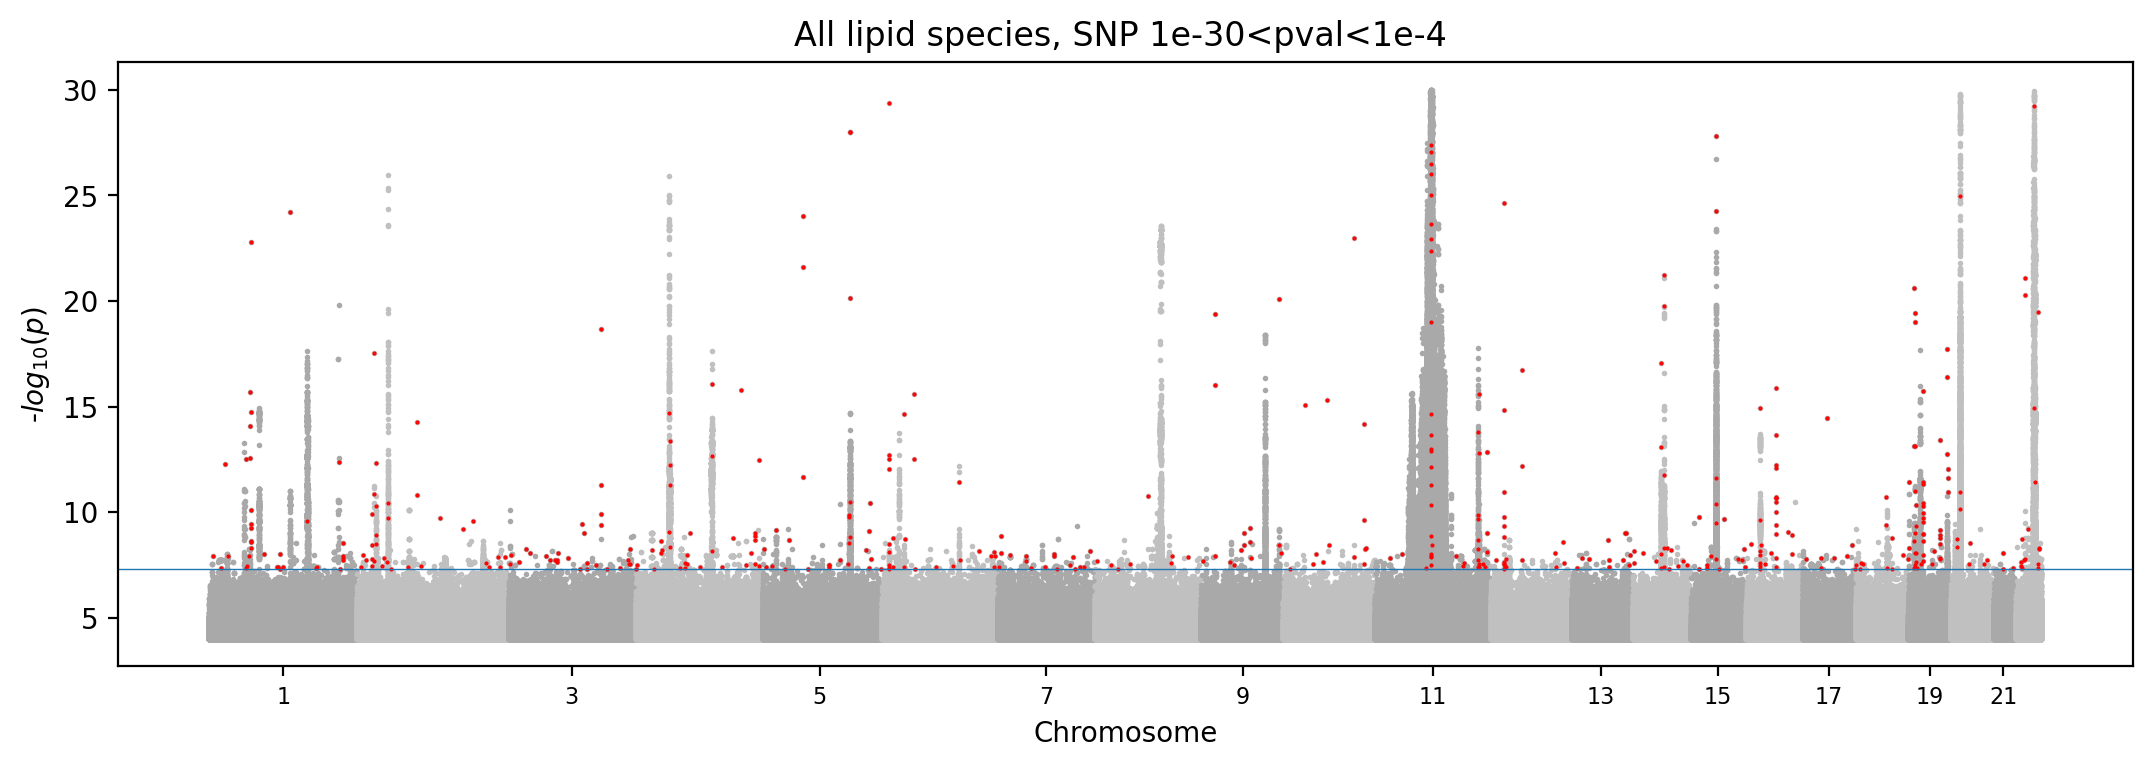

In [105]:
# Constraint pval to be less not less than 10^-30
# Change fig size
threshold=1e-30
f, a, df_constraint = manhattan_plot_multiple_gwas(data=df[df['P']>=threshold], index=True, pval='P', position='POS', chromosome='CHR',
                                                   sig_pval=0.05/(10**6), title=f'All lipid species, SNP {threshold}<pval<1e-4 ',
                                                   known=True, figsize=(13,4), colors=['darkgrey', 'silver'])
# fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_knwon_highlighted_constraint.jpg'
# f.savefig(fig_output_fn)

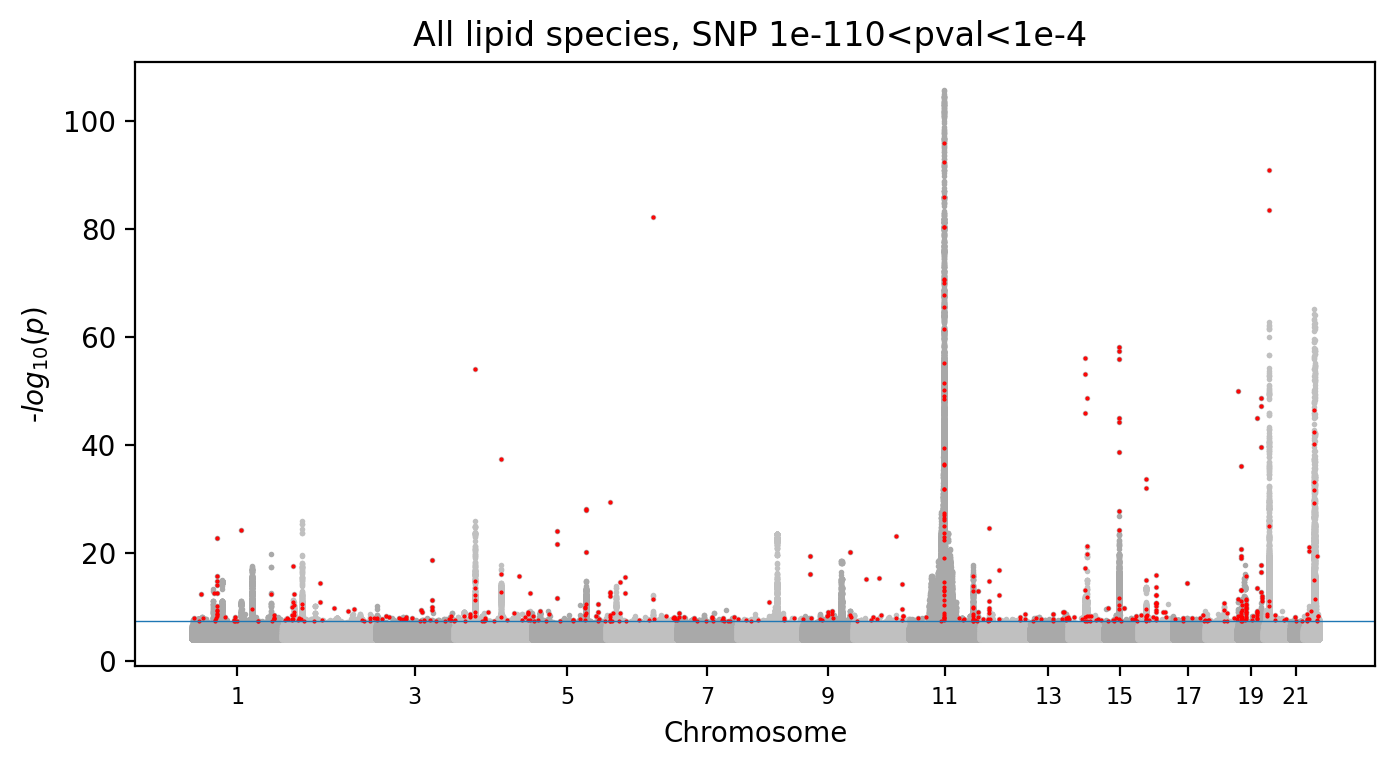

In [108]:
# Constraint pval to be less not less than 10^-30

threshold=1e-110
f, a, df_constraint = manhattan_plot_multiple_gwas(data=df[df['P']>=threshold], index=True, pval='P', position='POS', chromosome='CHR',
                                                   sig_pval=0.05/(10**6), title=f'All lipid species, SNP {threshold}<pval<1e-4 ',
                                                   known=True, colors=['darkgrey', 'silver'])
fig_output_fn = f'/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_knwon_highlighted_constraint_{threshold}.jpg'
f.savefig(fig_output_fn)

### 5.2 Plots of lQTl model
Only adjusted for sex, age, PCs and GRM

0 rows processed, index=1
.............................................................................771182 rows processed, index =211398


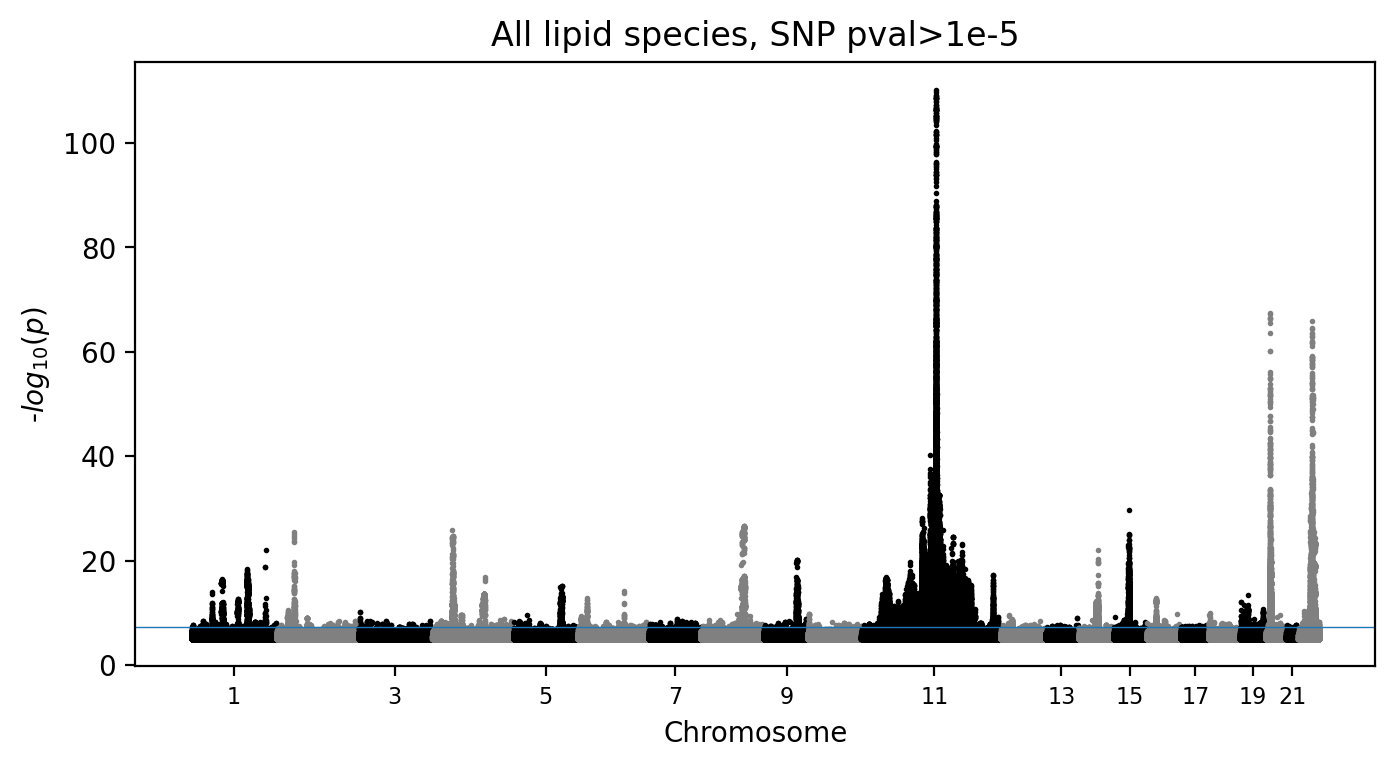

In [111]:
# Read in GWAS results of all lipid species
# Already filtered hits with pval <10^-5 and 10^-4

df_lst =[] # to store all filtered gwas result
dir_gwas_hits = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_noadj_BMI_AGE2_plots/'
for fn in os.listdir(dir_gwas_hits):
    if fn.endswith('.txt'):
        lipid = fn.split('_suggestive_sig_SNPs.txt')[0]
        df = pd.read_csv(dir_gwas_hits+fn, sep='\t')
        df['LIPID'] = lipid
        df_lst.append(df)

df_all_species = pd.concat(df_lst)
df_all_species.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_all_species.reset_index(drop=True, inplace=True)

f, a, df = manhattan_plot_multiple_gwas(data=df_all_species, pval='P', position='POS',
                                        chromosome='CHR', sig_pval=0.05/(10**6), title='All lipid species, SNP pval<1e-5')
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-5_noadj_BMI_AGE2.jpg'
f.savefig(fig_output_fn)

## 6. Compare to more previous studies

In [3]:
fn_filtered_snps = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_snps_pval_1e-3/all_SNPs_combined_no_dup_species.txt'
df_filtered_snps = pd.read_csv(fn_filtered_snps, sep='\t')
df_filtered_snps = df_filtered_snps[df_filtered_snps['P']<=5e-8].copy()
print(df_filtered_snps.shape)
display(df_filtered_snps.head())

print(len(df_filtered_snps['CHR'].unique()))
df_filtered_snps['CHR'].unique()

(1430, 10)


,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
262671,1,chr1:75631359:C:T,75631359,C,T,2096,0.221613,-0.238408,0.036634,7.621640e-11
262672,1,chr1:75631396:A:G,75631396,A,G,2096,0.222090,-0.238384,0.036576,7.147680e-11
262676,1,chr1:75632337:TA:T,75632337,TA,T,2096,0.221613,-0.238408,0.036634,7.621640e-11
262717,1,chr1:75637345:C:T,75637345,C,T,2096,0.222090,-0.234682,0.036628,1.482170e-10
262739,1,chr1:75640990:T:C,75640990,T,C,2096,0.280296,-0.259175,0.033355,7.832000e-15


16


array([ 1,  2,  4,  5,  6,  8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 22])

In [4]:
dir_known_hits = '/data100t1/home/wanying/CCHC/lipidomics/input_docs/known_hits'
df_tabassum_2019 = pd.read_csv(f'{dir_known_hits}/Tabassum_2019_Nat_Comm_b38.txt',
                               sep='\t').rename(columns={'Chr':'CHR', 'SNP':'rsID', 'Position':'POS'})
display(df_tabassum_2019.head(2))
df_cadby_2021 = pd.read_csv(f'{dir_known_hits}/Cadby_2021_Nat_Commun_b38.txt',
                            sep='\t').rename(columns={'nearest_genes':'Nearest gene'})
display(df_cadby_2021.head(2))

cols = ['CHR', 'rsID', 'POS']
# df_all_known = pd.concat([df_tabassum_2019[cols], df_cadby_2021[cols]])
df_all_known = pd.concat([df_tabassum_2019, df_cadby_2021])
df_all_known.drop_duplicates(subset=['CHR', 'POS'], inplace=True)
print(df_all_known.shape)
display(df_all_known.head(2))

,rsID,CHR,POS,Nearest gene,Lipid species,Lipid class,Ref,Alt,Alt freq,Beta,SE,P,New/Known
0,rs201385366,1.0,962486.0,KLHL17,LPE(22:6;0),LPE,C,T,0.0192,-0.8736,0.1586,3.600000e-08,New
1,rs187163948,1.0,14072651.0,KAZN,TAG(53:3;0),TAG,G,A,0.0113,0.9496,0.1723,3.500000e-08,New


,CHR,POS,ref,alt,rsID,pval,Nearest gene
0,1,2368718,C,A,rs12070927,5.000000e-07,MORN1
1,1,3691942,G,A,rs759172324,3.600000e-07,TP73


(4729, 16)


,rsID,CHR,POS,Nearest gene,Lipid species,Lipid class,Ref,Alt,Alt freq,Beta,SE,P,New/Known,ref,alt,pval
0,rs201385366,1.0,962486.0,KLHL17,LPE(22:6;0),LPE,C,T,0.0192,-0.8736,0.1586,3.600000e-08,New,NaN,NaN,NaN
1,rs187163948,1.0,14072651.0,KAZN,TAG(53:3;0),TAG,G,A,0.0113,0.9496,0.1723,3.500000e-08,New,NaN,NaN,NaN


In [5]:
df_merged = df_all_known.merge(df_filtered_snps[['CHR', 'SNP', 'POS']],
                               on=['CHR', 'POS'], how='outer', indicator=True)

print(len(df_merged[df_merged['_merge']=='both']))
print(len(df_merged[df_merged['_merge']=='left_only']))

168
4561


In [8]:
df_merged.head(5)

,rsID,CHR,POS,Nearest gene,Lipid species,Lipid class,Ref,Alt,Alt freq,Beta,SE,P,New/Known,ref,alt,pval,SNP,_merge
0,rs201385366,1.0,962486.0,KLHL17,LPE(22:6;0),LPE,C,T,0.0192,-0.8736,0.1586,3.600000e-08,New,NaN,NaN,NaN,NaN,left_only
1,rs187163948,1.0,14072651.0,KAZN,TAG(53:3;0),TAG,G,A,0.0113,0.9496,0.1723,3.500000e-08,New,NaN,NaN,NaN,NaN,left_only
2,rs56266464,2.0,43827852.0,ABCG5/8,CE(20:2;0),CE,G,A,0.0745,-0.3822,0.0643,2.800000e-09,Known,NaN,NaN,NaN,NaN,left_only
3,rs114938914,2.0,43828371.0,ABCG5/8,CE(20:2;0),CE,C,T,0.0742,-0.3844,0.0646,2.600000e-09,Known,NaN,NaN,NaN,NaN,left_only
4,rs111617668,2.0,43828783.0,ABCG5/8,CE(20:2;0),CE,C,T,0.0745,-0.3822,0.0643,2.800000e-09,Known,NaN,NaN,NaN,NaN,left_only


### 6.1 Create manhattan plot overlay with known hits

In [11]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# Modified manhattan plot
def manhattan_plot_multiple_gwas(data: pd.core.frame.DataFrame, pval: str='pval', position: str='pos',
                   chromosome: str='chr', gene: str='', title: str='manhattan plot',
                   sig_pval: float=-1, annotate: bool=False, colors: list=['black','grey'],
                   dpi: float=200, figsize: tuple=(8,4), index: bool=False, known: bool=False):
    '''
    Plot Manhattan plot from summary statistics of multiple GWASs
    Params
    - data: A dataframe containing summary statistics of multiple GWASs. Filter SNPs by pvalue first, such as pval<10^-5
    - pval: column name of p values
    - position: column name of position
    - chromosome: column name of chromosome
    - gene: column of gene names for annotation (only used if annotate=True)
    - title: figure title
    - sig_pval: threshold of significant p value (No multiple testing correction will be applied on this threshold)
                Default values -1 implies 0.05/number_of_tests is used.
    - annotate: anotate significant points (BF correction)
    - colors: list of colors to plot each chromosome. Default is ['black','grey']
    - dpi, figsize: resolution and figure size
    - index: if the input dataframe needs to be reindexed (arbitraty indices for plotting). Column header of index column must be 'indx'
    - known: Whether to plot known hits. defined by 'CAT' column ('known')
    Return
    - fig, ax
    '''
    if annotate: # If name of gene column is provided
        data_copy = data[[gene, chromosome, position, pval]].sort_values(by=[chromosome, position, pval]).copy()
    else:
        if known: # Hightlight known hits (pvals are from other studies)
            if index: # Hightlight known hits (pvals are from other studies)
                data_copy = data[[chromosome, position, pval, 'indx', 'CAT']].sort_values(by=[chromosome, position, pval]).copy()
            else:
                data_copy = data[[chromosome, position, pval, 'CAT']].sort_values(by=[chromosome, position, pval]).copy()
        else:
            data_copy = data[[chromosome, position, pval]].sort_values(by=[chromosome, position, pval]).copy()
    
    if not index:
        # Create arbitrary indices for plotting. Same position share the same index value
        indx, curr_pos, lst_indx = 0, 0, [] # lst_indx stores indices for each posiiont
        for row in range(len(data_copy)): # Assume input dataframe has clean row index starting from 0
            if curr_pos != data_copy.loc[row, position]: # Keep track of current posiont
                curr_pos = data_copy.loc[row, position]
                indx += 1
            lst_indx.append(indx)
            if row%1000000 == 0: print(f'{row} rows processed, index={indx}', flush=True)
            elif row%10000 == 0: print('.', end='', flush=True)
        print(f'{row} rows processed, index ={indx}', flush=True)
        data_copy['indx'] = lst_indx
    
    data_copy['log_pval'] = -np.log10(data_copy[pval]) # Plot -log10 pvalues
    label_text, label_pos = [], [] # Keep track of label text and label positions
    grouped = data_copy.groupby(by=chromosome)
    
    fig, ax = plt.subplots(dpi=dpi, figsize=figsize)
    count=0
    for chr_num, df in grouped: # Plot each group (grouped by chromosome)
        label_text.append(chr_num)
        label_pos.append(df['indx'].mean())
        ax.plot(df['indx'], df['log_pval'], ls='', marker='.', color=colors[count%len(colors)], markersize=2)
        # ax.plot(df['indx'], df['log_pval'], ls='', marker='.', color=colors[count%len(colors)])
        count += 1
        
    if known: # Hightlight known hits (pvals are from other studies)
        df_known = data_copy[(data_copy['CAT']=='known') & (data_copy[pval]<=sig_pval)]
        ax.plot(df_known['indx'], df_known['log_pval'], ls='', marker='.', color='red', markersize=1)
        
    if title is not None: ax.set_title(title)
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('-$log_{10}(p)$')
    
    # Plot significant line of p value
    if sig_pval == -1: sig_pval = 0.05/len(data_copy)
    ax.axhline(y=-np.log10(sig_pval), lw=0.5)
    ax.set_xticks([label_pos[i] for i in range(0, len(label_pos), 2)])
    ax.set_xticklabels([label_text[i] for i in range(0, len(label_text), 2)], fontsize='8')
    
    if annotate:
        if gene=='': raise ValueError('name of gene column cannot be empty')
        sig_points = data_copy[data_copy[pval]<=(sig_pval)] # Significant data points
        for i in range(len(sig_points)):
            tmp = sig_points.iloc[[i],:] # Cut the temp data for plotting
            ax.annotate(text=tmp[gene].values[0],
                        xy=(tmp['indx'].values[0], tmp['log_pval'].values[0]), fontsize='5')
    
    return fig, ax, data_copy


In [18]:
# Read in GWAS results of all lipid species
# Already filtered hits with pval <10^-5 and 10^-4

df_lst =[] # to store all filtered gwas result
dir_gwas_hits = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_snps_pval_1e-4/'
count = 0
for fn in os.listdir(dir_gwas_hits):
    if fn.endswith('_suggestive_sig_SNPs.txt'):
        lipid = fn.split('_suggestive_sig_SNPs.txt')[0]
        df = pd.read_csv(os.path.join(dir_gwas_hits, fn), sep='\t')
        df['LIPID'] = lipid
        df_lst.append(df)
        count += 1
        print(f'\r# Process {count}', flush=True, end='')

df_all_species = pd.concat(df_lst)
df_all_species.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_all_species.reset_index(drop=True, inplace=True)

# df: Lipid species, GWAS NP with pval<10^-4 (check plotting code above)
# Merge known hits (df_merged) with my results
col_known_hits = ['CHR', 'POS', 'Nearest gene']
df_merged_all_snps = df_all_species.merge(df_merged[col_known_hits], on=['CHR', 'POS'], how='outer', indicator=True)
df_merged_all_snps.rename(columns={'_merge':'CAT'}, inplace=True)
df_merged_all_snps['CAT'] = df_merged_all_snps['CAT'].replace(['right_only', 'both'], 'known')
df_merged_all_snps.sort_values(by=['CHR', 'POS'], inplace=True)
df_merged_all_snps.reset_index(drop=True, inplace=True)
df_merged_all_snps.head()

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,LIPID,Nearest gene,CAT
0,1.0,chr1:47647:G:T,47647.0,T,G,2096.0,0.000477,-2.59912,0.657190,0.000077,PC-16:0_20:3-_-a-,NaN,left_only
1,1.0,chr1:47647:G:T,47647.0,T,G,2096.0,0.000477,-2.62789,0.670487,0.000089,PC-18:0_20:3-,NaN,left_only
2,1.0,chr1:62046:A:G,62046.0,G,A,2096.0,0.000716,2.24614,0.563943,0.000068,PC-32:2-,NaN,left_only
3,1.0,chr1:81313:T:G,81313.0,G,T,2096.0,0.000239,-3.77159,0.957573,0.000082,HexCer-d18:2-18:0-,NaN,left_only
4,1.0,chr1:101552:G:C,101552.0,C,G,2096.0,0.000716,2.24614,0.563943,0.000068,PC-32:2-,NaN,left_only


In [40]:
print('# Known hits:', len(df_merged_all_snps[df_merged_all_snps['CAT']=='known']))
print('# Potential new hits:', len(df_merged_all_snps[df_merged_all_snps['CAT']!='known']))

# Known hits: 50869
# Potential new hits: 5559316


In [32]:
# Create combined SNPs without duplication
# Keep the smallest p value for a given SNP
df_merged_all_snps = df_merged_all_snps.sort_values(by=['CHR', 'POS', 'P'])
df_merged_all_snps_no_dup.drop_duplicates(subset='POS', keep='first', inplace=True)

In [44]:
df_merged_all_snps_no_dup[df_merged_all_snps_no_dup['CHR']==9].sort_values(by='P')

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,LIPID,Nearest gene,CAT
2941670,9.0,chr9:114636823:G:T,114636823.0,T,G,2096.0,0.262882,-0.314008,0.035161,4.235660e-19,HexCer-d18:1-24:0-,NaN,left_only
2941515,9.0,chr9:114635548:G:A,114635548.0,A,G,2096.0,0.262882,-0.314008,0.035161,4.235660e-19,HexCer-d18:1-24:0-,NaN,left_only
2941679,9.0,chr9:114636865:A:G,114636865.0,G,A,2096.0,0.262882,-0.314008,0.035161,4.235660e-19,HexCer-d18:1-24:0-,NaN,left_only
2941491,9.0,chr9:114634798:AC:A,114634798.0,A,AC,2096.0,0.262882,-0.314008,0.035161,4.235660e-19,HexCer-d18:1-24:0-,NaN,left_only
2941736,9.0,chr9:114638227:T:A,114638227.0,A,T,2096.0,0.263120,-0.312373,0.035076,5.308430e-19,HexCer-d18:1-24:0-,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984529,9.0,NaN,136541368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOTCH1,known
2984630,9.0,NaN,136599704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOTCH1,known
2985058,9.0,NaN,136734035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCN10,known
2985443,9.0,NaN,136907745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAF2,known


0 rows processed, index=1
...................................................................................................1000000 rows processed, index=1000001
..............................................................................1782498 rows processed, index =1782499


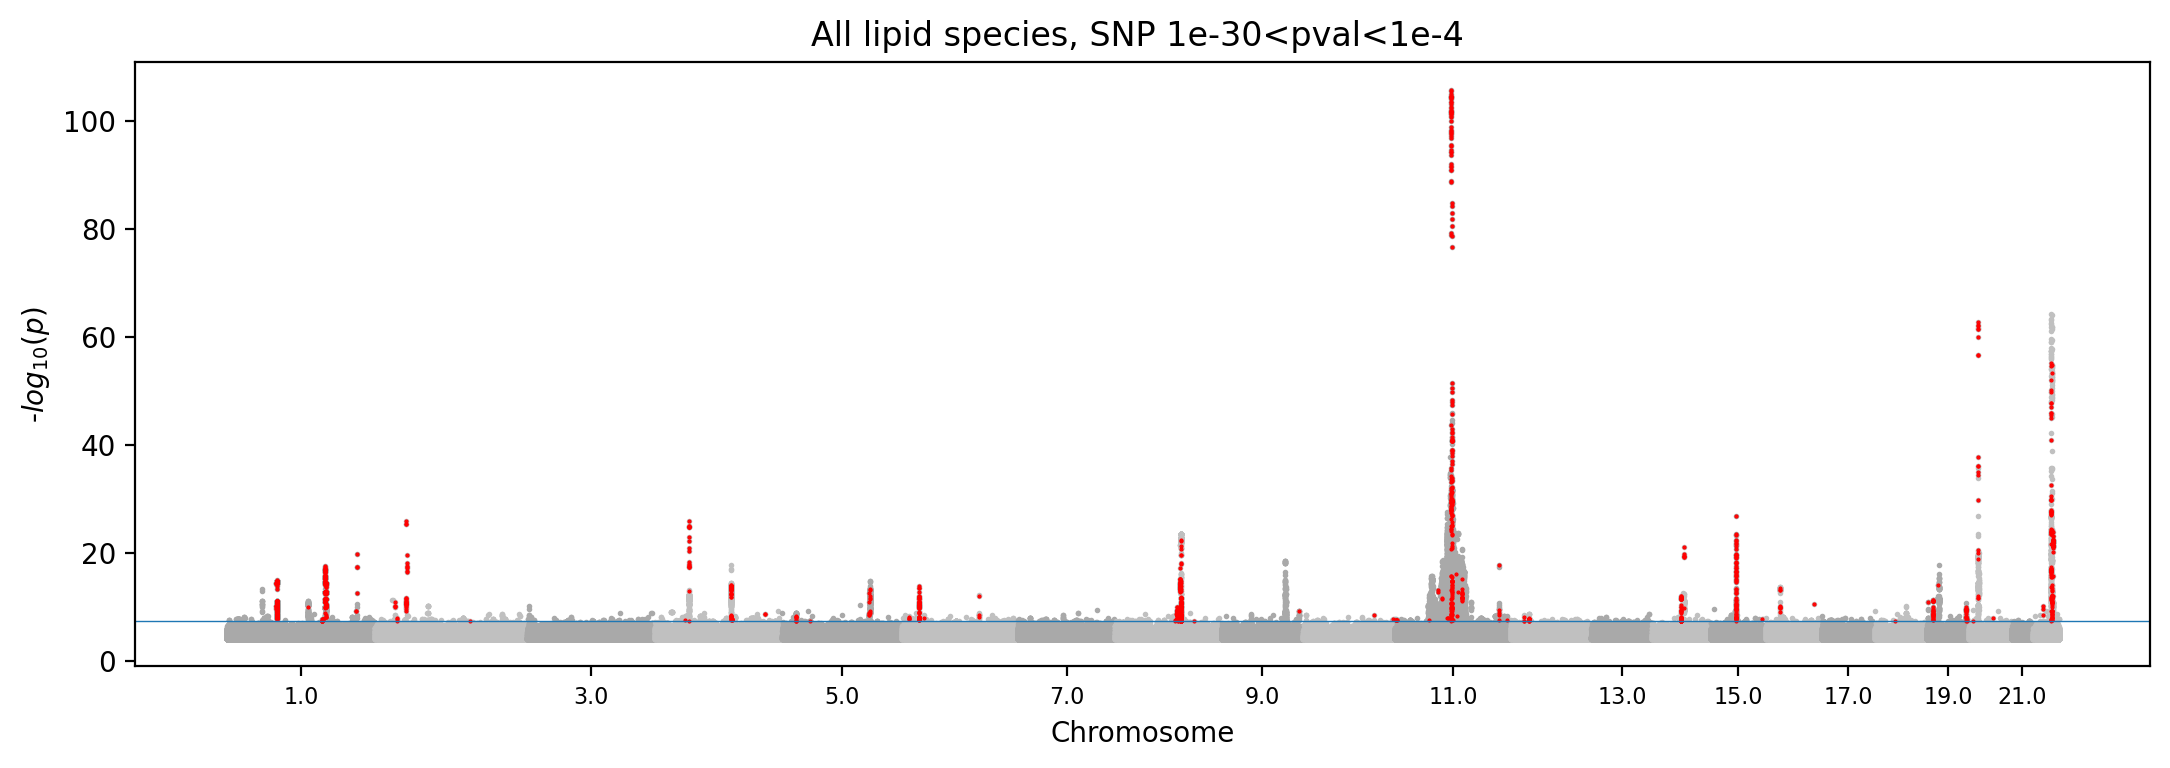

In [41]:
f, a, df_constraint = manhattan_plot_multiple_gwas(data=df_merged_all_snps_no_dup.reset_index(),
                                                   pval='P', position='POS', chromosome='CHR',
                                                   sig_pval=5e-8, title=f'All lipid species, SNP {threshold}<pval<1e-4 ',
                                                   known=True, figsize=(13,4), colors=['darkgrey', 'silver'])
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_no_dup_knwon_highlighted_Cabdy_and_Tabassum.jpg'
f.savefig(fig_output_fn)

0 rows processed, index=1
...................................................................................................1000000 rows processed, index=1000001
.............................................................................1778365 rows processed, index =1778366


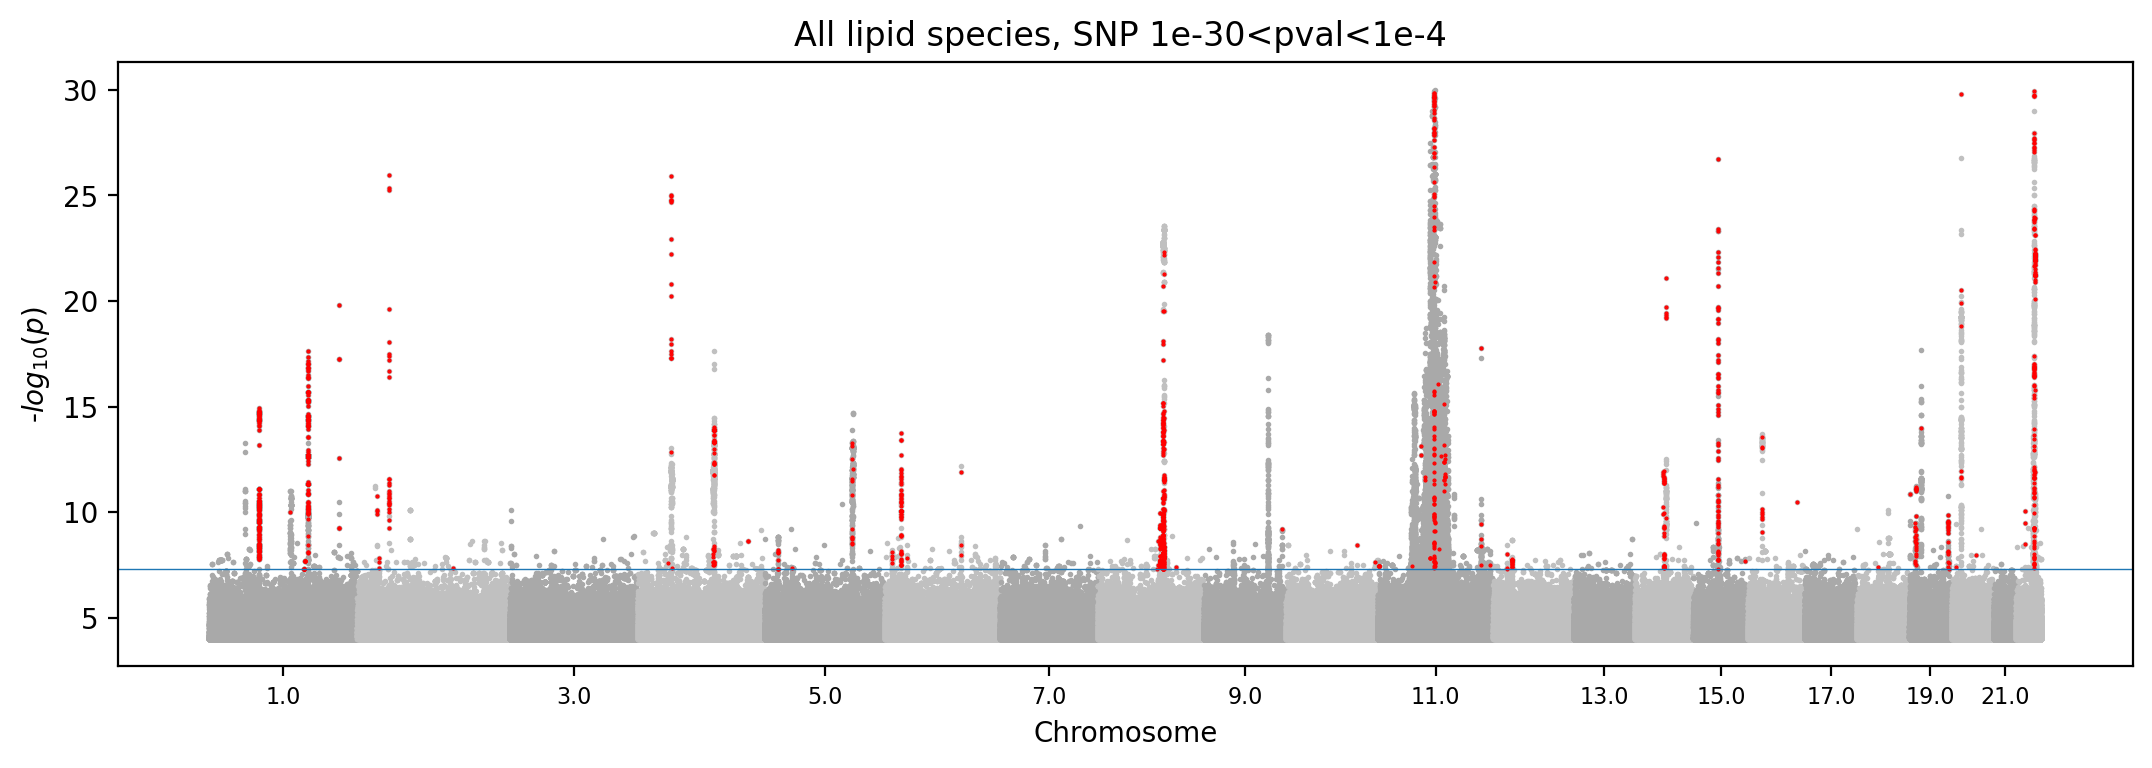

In [38]:
# Constraint pval to be less not less than 10^-30
# Change fig size
threshold=1e-30
f, a, df_constraint = manhattan_plot_multiple_gwas(data=df_merged_all_snps_no_dup[df_merged_all_snps_no_dup['P']>=threshold].reset_index(),
                                                   pval='P', position='POS', chromosome='CHR',
                                                   sig_pval=5e-8, title=f'All lipid species, SNP {threshold}<pval<1e-4 ',
                                                   known=True, figsize=(13,4), colors=['darkgrey', 'silver'])
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_no_dup_knwon_highlighted_Cabdy_and_Tabassum_contrained_1e-30.jpg'
f.savefig(fig_output_fn)

0 rows processed, index=1
...................................................................................................1000000 rows processed, index=348811
...................................................................................................2000000 rows processed, index=697923
...................................................................................................3000000 rows processed, index=1053104
...................................................................................................4000000 rows processed, index=1241785
...................................................................................................5000000 rows processed, index=1579338
............................................................5603160 rows processed, index =1787226


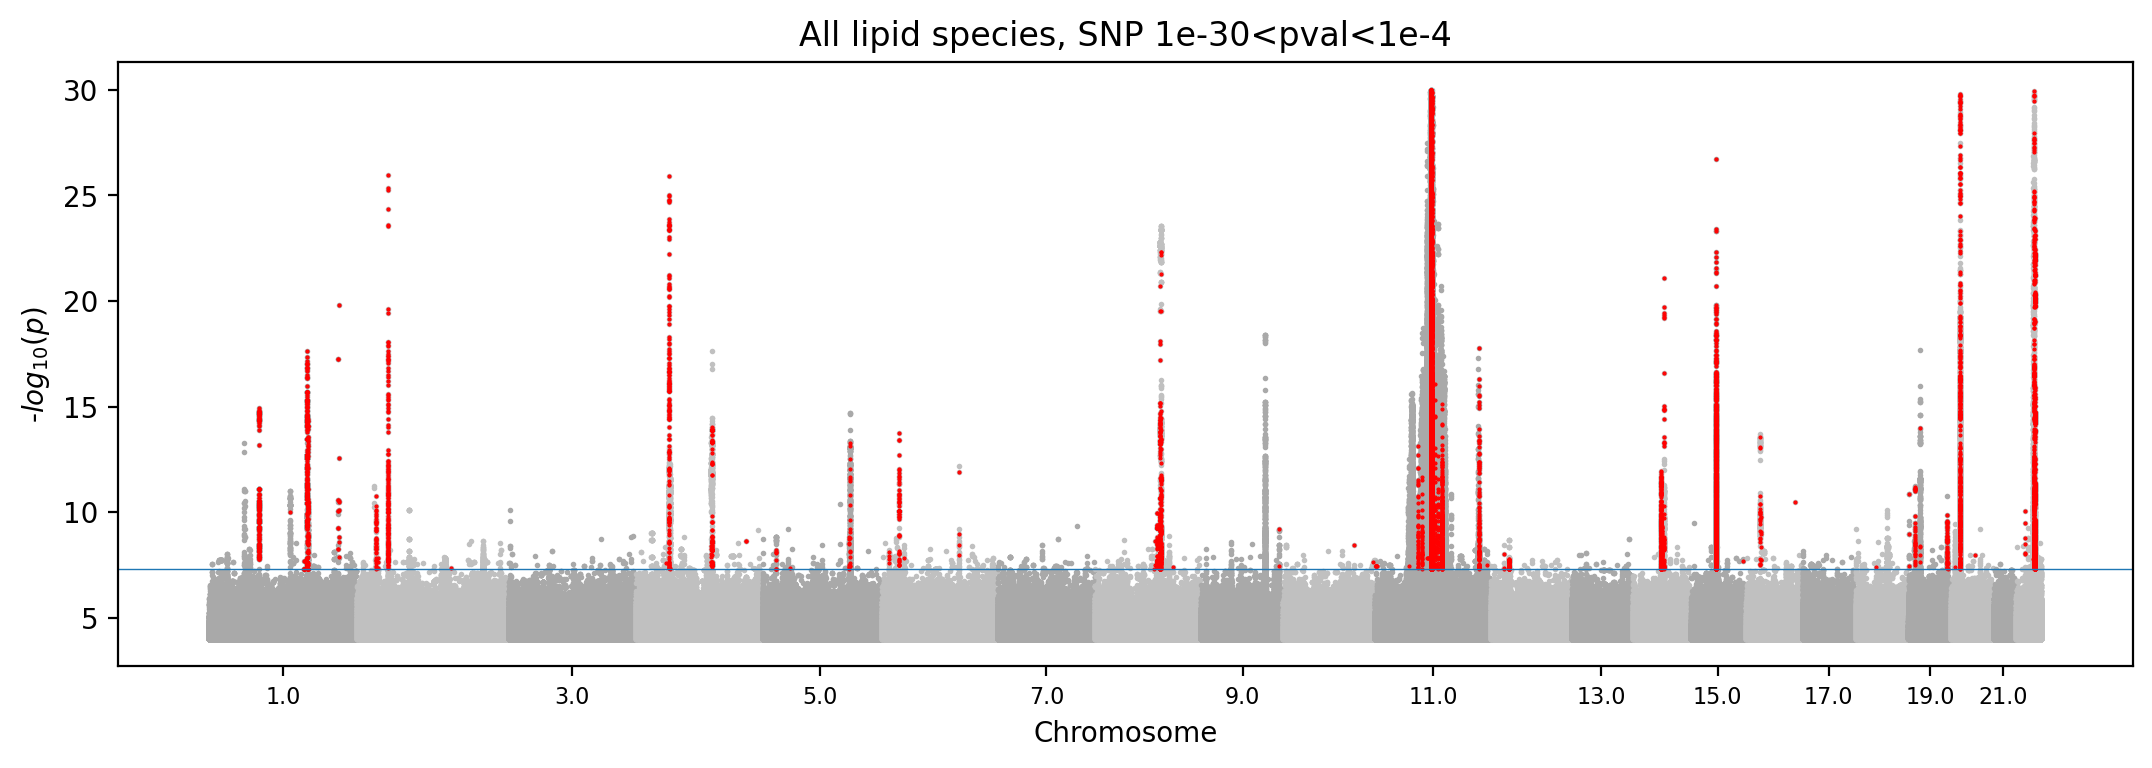

In [26]:
f, a, df = manhattan_plot_multiple_gwas(data=df_merged_all_snps[df_merged_all_snps['P']>1e-30].reset_index(), pval='P', position='POS', chromosome='CHR',
                                        sig_pval=5e-8, title='All lipid species, SNP 1e-30<pval<1e-4',
                                        known=True, figsize=(13,4), colors=['darkgrey', 'silver'])
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_knwon_highlighted_Cabdy_and_Tabassum_contrained_1e-30.jpg'
f.savefig(fig_output_fn)

0 rows processed, index=1
...................................................................................................1000000 rows processed, index=349262
...................................................................................................2000000 rows processed, index=699024
...................................................................................................3000000 rows processed, index=1054391
...................................................................................................4000000 rows processed, index=1242889
...................................................................................................5000000 rows processed, index=1580182
.............................................................5610184 rows processed, index =1791125


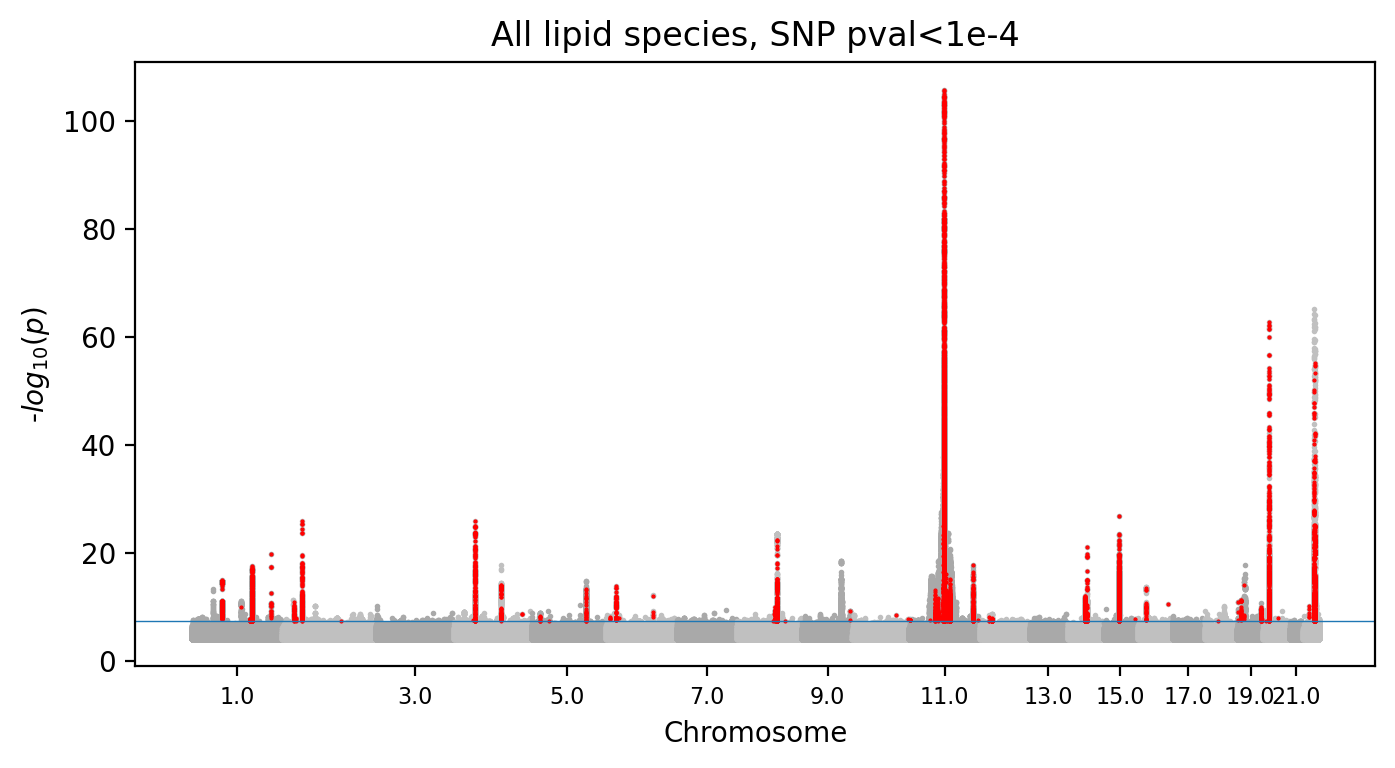

In [19]:
f, a, df = manhattan_plot_multiple_gwas(data=df_merged_all_snps, pval='P', position='POS', chromosome='CHR',
                                        sig_pval=5e-8, title='All lipid species, SNP pvdrop_duplicates',
                                        known=True, colors=['darkgrey', 'silver'])
fig_output_fn = '/data100t1/home/wanying/CCHC/lipidomics/output/plots/lipid_species_all_pval_1e-4_knwon_highlighted_Cabdy_and_Tabassum.jpg'
f.savefig(fig_output_fn)

### TBA

In [9]:
print(len(df_merged[df_merged['_merge']=='both']['Nearest gene'].unique()))

17


In [10]:
df_merged[df_merged['_merge']=='both']['Nearest gene'].unique()

array(['ABCG5/8', 'FADS2', 'SYNE2', 'LIPC', 'ATP10D', 'UGT8',
       'FADS1,FADS2', 'FADS3', 'TMEM229B', 'NTAN1,PDXDC1', 'PDXDC1',
       'PDXDC1,RRN3', 'SDR42E1', 'CERS4', 'SPTLC3', 'A4GALT', 'PNPLA3'],
      dtype=object)

In [49]:
print(', '.join(df_merged[df_merged['_merge']=='both']['Nearest gene'].unique()))

ABCG5/8, FADS2, ATP10D, UGT8, TMEM258, FADS1,FADS2, FADS3, SYNE2, TMEM229B, ALDH1A2,LIPC, NTAN1,PDXDC1, PDXDC1, PDXDC1,RRN3, SDR42E1, CERS4, SPTLC3, A4GALT, PNPLA3


In [75]:
df_novel = df_merged[df_merged['_merge']=='right_only']
df_novel[df_novel['CHR']==11]

,S.N.,rsID,CHR,POS,Nearest gene,Lipid species,Lipid class,Ref,Alt,Alt freq,Beta *,SE,P,New/Known,ref,alt,pval,SNP,_merge
5091,NaN,NaN,11,1182716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:1182716:C:T,right_only
5092,NaN,NaN,11,1513518.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:1513518:C:T,right_only
5093,NaN,NaN,11,1605967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:1605967:C:T,right_only
5094,NaN,NaN,11,1708937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:1708937:G:C,right_only
5095,NaN,NaN,11,1788972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:1788972:C:T,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,NaN,NaN,11,67813509.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:67813509:A:C,right_only
5201,NaN,NaN,11,67813552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:67813552:T:C,right_only
5202,NaN,NaN,11,67814080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:67814080:G:A,right_only
5203,NaN,NaN,11,67814678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr11:67814678:A:G,right_only


In [86]:
df_novel[df_novel['CHR']==9]

,S.N.,rsID,CHR,POS,Nearest gene,Lipid species,Lipid class,Ref,Alt,Alt freq,Beta *,SE,P,New/Known,ref,alt,pval,SNP,_merge


In [83]:
df_novel[df_novel['CHR']==9].tail(60)

,S.N.,rsID,CHR,POS,Nearest gene,Lipid species,Lipid class,Ref,Alt,Alt freq,Beta *,SE,P,New/Known,ref,alt,pval,SNP,_merge


In [84]:
df_novel[df_novel['CHR']==9].head(60)

,S.N.,rsID,CHR,POS,Nearest gene,Lipid species,Lipid class,Ref,Alt,Alt freq,Beta *,SE,P,New/Known,ref,alt,pval,SNP,_merge


In [7]:
df_filtered_snps.sort_values(by='P')

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P
6507240,11,chr11:61814292:T:C,61814292,T,C,2096,0.378578,-0.403875,0.030586,8.262670e-40
6507198,11,chr11:61803876:C:G,61803876,C,G,2096,0.379771,-0.401434,0.030565,2.111690e-39
6507232,11,chr11:61812288:T:C,61812288,T,C,2096,0.396947,-0.401262,0.030593,2.654190e-39
6507238,11,chr11:61813896:A:G,61813896,A,G,2096,0.396947,-0.401262,0.030593,2.654190e-39
6507236,11,chr11:61813163:C:T,61813163,C,T,2096,0.396947,-0.401262,0.030593,2.654190e-39
...,...,...,...,...,...,...,...,...,...,...
3452918,5,chr5:131816681:G:C,131816681,C,G,2096,0.122853,0.230852,0.042301,4.831140e-08
5137718,8,chr8:86676430:G:A,86676430,A,G,2096,0.194656,0.204472,0.037468,4.835830e-08
8023903,15,chr15:58431476:C:T,58431476,C,T,2096,0.468750,-0.153459,0.028130,4.889110e-08
6526031,11,chr11:65379263:C:G,65379263,C,G,2096,0.395992,0.154939,0.028408,4.921340e-08


In [46]:
# Merge GWAS result of lipid species for filtering
gwas_result_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_snps_pval_1e-4/'
list_dfs_1e_8 = [] # P<1e-8
list_dfs_5e_8 = [] # P<5e-8
count = 0
for fn in os.listdir(gwas_result_dir):
    df_tmp = pd.read_csv(f'{gwas_result_dir}/{fn}', sep='\t')
    list_dfs_1e_8.append(df_tmp[df_tmp['P']<=1e-8].copy())
    list_dfs_5e_8.append(df_tmp[df_tmp['P']<=5e-8].copy())
    count += 1
    if count%10 == 0:
        print('.', end='', flush=True)
print('\n#Merge significant SNPs of all dataframes')
df_all_merged_1e_8 = pd.concat(list_dfs_1e_8)
df_all_merged_5e_8 = pd.concat(list_dfs_5e_8)
print(len(df_all_merged_1e_8), len(df_all_merged_5e_8))

print('#Drop duplicates')
df_all_merged_1e_8.drop_duplicates(subset='SNP', inplace=True)
df_all_merged_5e_8.drop_duplicates(subset='SNP', inplace=True)
print(len(df_all_merged_1e_8), len(df_all_merged_5e_8))

...................................................................................
#Merge significant SNPs of all dataframes
95519 123651
#Drop duplicates
9902 12365


In [54]:
tmp = df_all_known.merge(df_all_merged_1e_8, on=['CHR', 'POS'])
len(tmp['Nearest gene'].unique())

35

In [55]:
tmp['Nearest gene'].unique()

array(['ABCG5/8', 'FADS2', 'THEM4', 'SNX17', 'GCKR', 'ATP10D', 'UGT8',
       'SLC22A4', 'SLC22A5', 'ELOVL2', 'SLC22A16', 'ABO', 'PKD2L1',
       'TMEM258', 'FADS1,FADS2', 'FADS3', 'ZPR1', 'SLCO1B1', 'SYNE2',
       'TMEM229B', 'ALDH1A2', 'ALDH1A2,LIPC', 'NTAN1,PDXDC1', 'PDXDC1',
       'PDXDC1,RRN3', 'SDR42E1', 'ABCA7', 'CERS4', 'TMC4', 'MBOAT7',
       'SPTLC3', 'GAL3ST1', 'CYB5R3', 'A4GALT', 'PNPLA3'], dtype=object)

In [53]:
df_merged[df_merged['_merge']=='both']['Nearest gene'].unique()

array(['ABCG5/8', 'FADS2', 'ATP10D', 'UGT8', 'TMEM258', 'FADS1,FADS2',
       'FADS3', 'SYNE2', 'TMEM229B', 'ALDH1A2,LIPC', 'NTAN1,PDXDC1',
       'PDXDC1', 'PDXDC1,RRN3', 'SDR42E1', 'CERS4', 'SPTLC3', 'A4GALT',
       'PNPLA3'], dtype=object)

In [56]:
out_dir ='/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS'

In [64]:
cols_to_save = ['CHR', 'SNP', 'POS', 'A1', 'A2', 'N', 'AF1']
df_all_merged_1e_8.sort_values(by=['CHR', 'POS', 'A1', 'A2'], inplace=True)
df_all_merged_5e_8.sort_values(by=['CHR', 'POS', 'A1', 'A2'], inplace=True)
df_all_merged_1e_8[cols_to_save].to_csv(f'{out_dir}/all_SNPs_combined_no_dup_pval_1e-8.txt',
                                        sep='\t', index=False)
df_all_merged_5e_8[cols_to_save].to_csv(f'{out_dir}/all_SNPs_combined_no_dup_pval_5e-8.txt',
                                        sep='\t', index=False)



(12365, 10)

In [61]:
df_all_merged_5e_8.columns

Index(['CHR', 'SNP', 'POS', 'A1', 'A2', 'N', 'AF1', 'BETA', 'SE', 'P'], dtype='object')